** Notes **
* Be very careful when constructing the resolution matrix. If missed by a transpose, the result will be wrong!!

In [212]:
# %cd ~/dev/graphite-DOS/irradiated-notebooks/

In [1]:
from matplotlib import pyplot as plt


In [2]:
from __future__ import (absolute_import, division, print_function)

import os, sys
import numpy as np
from matplotlib import pyplot as plt
import numpy as np, histogram.hdf as hh, histogram as H
from scipy.interpolate import interp1d
import warnings
from numpy import linalg as LA

In [3]:
# %matplotlib notebook
%matplotlib inline

In [4]:
sys.path.insert(0, '/home/fi0/dev/sandbox/SR-INS/1D/dev/srins/')
sys.path.append('/home/fi0/dev/sandbox/SR-INS/srins/Jiao_Res/graphite-DOS/dgsres')

In [5]:
# sys.path.insert(0, '/home/lj7/dv/srins/srins/')
# sys.path.insert(0, '/SNS/users/lj7/dv/srins/srins-jiao/')

In [6]:
import srins

In [7]:
!rm /home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/linearizedBregman.pyc
import srins.powder.linearizedBregman as splb; reload(splb)
import srins.powder.conv_deconv as spcd
import srins.powder.Lucy_Richardson as LR; reload(LR)
import srins.powder.bregmanSplit as spbs; 
!rm /home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/bregmanSplit.pyc
reload(spbs)

!rm /home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/Lucy_Richardson.pyc
reload(LR)

<module 'srins.powder.Lucy_Richardson' from '/home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/Lucy_Richardson.py'>

In [8]:
from srins.powder.conv_deconv import convolve_NS as F

In [9]:
import srins.powder.linearizedBregman as splb; reload(splb)

<module 'srins.powder.linearizedBregman' from '/home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/linearizedBregman.pyc'>

In [10]:
Eaxis_300 = np.arange(-50, 240, 0.1)
Eaxis_30 = np.arange(-20, 80, 0.1)
Eaxis_130 =np.arange(-30, 200, 0.1)

negAxis_30=20
negAxis_130=30
negAxis_300=50

In [11]:
print (Eaxis_30.shape, Eaxis_130.shape, Eaxis_300.shape)

(1000,) (2300,) (2900,)


In [12]:
res_mat300=np.load ('res_matrix_Ei_300.npy')
res_mat130=np.load('res_matrix_Ei130.npy')
res_mat30=np.load('res_matrix_Ei30.npy')

In [13]:
print (res_mat30.shape, res_mat130.shape,res_mat300.shape)

(1000, 1000) (2300, 2300) (2900, 2900)


In [14]:
# # print (Et)
# print (negAxis_30)
# # print (spacing)
# print ((Et+negAxis_30)*spacing)

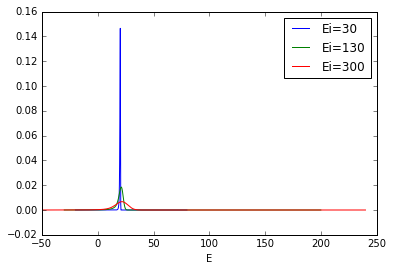

In [15]:
Et=20 #25
# negAxis=50
spacing=10
plt.figure()
plt.plot(Eaxis_30, res_mat30[(Et+negAxis_30)*spacing]/res_mat30[(Et+negAxis_30)*spacing].sum(), label='Ei=30')
plt.plot(Eaxis_130, res_mat130[(Et+negAxis_130)*spacing]/res_mat130[(Et+negAxis_130)*spacing].sum(), label='Ei=130')
plt.plot(Eaxis_300, res_mat300[(Et+negAxis_300)*spacing]/res_mat300[(Et+negAxis_300)*spacing].sum(),label='Ei=300')
plt.xlabel("E")
plt.legend(fontsize='large')
plt.show()

In [16]:
# res=np.vstack((res_mat30[0:(15+negAxis_30)*spacing,:], res_mat130[(15+negAxis_130)*spacing:(100+negAxis_300)*spacing,:], res_mat300[(100+negAxis)*spacing::,:]))
# print (resN_30.shape)

# plt.figure()
# plt.imshow(resN_30)
# plt.show()

In [17]:
# plt.figure()
# plt.plot(resN_30[750])
# plt.plot(resN_30[800])
# plt.show()

In [18]:
doshist = hh.load('dos_30_130_300.h5')
g = doshist.I

In [19]:
E = doshist.E

In [20]:
g1 = np.interp(Eaxis_130, E, g)

g1_30 = np.interp(Eaxis_30, E, g)
g1_130 = np.interp(Eaxis_130, E, g)
g1_300 = np.interp(Eaxis_300, E, g)

In [21]:
print (g1_30.shape ,res_mat30.shape)

(1000,) (1000, 1000)


## Linearized Bregman

In [22]:
!rm /home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/linearizedBregman.pyc
import srins.powder.linearizedBregman as splb; reload(splb)

<module 'srins.powder.linearizedBregman' from '/home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/linearizedBregman.py'>

In [23]:
doshist_130 = hh.load('final-dos_130.h5')
doshist_300 = hh.load('final-dos_300.h5')

In [24]:
Error_30=doshist.E2
Error_130=doshist_130.E2
Error_300=doshist_300.E2

In [25]:
value_30=np.sqrt(np.nanmean(Error_30))
value_130=np.sqrt(np.nanmean(Error_130))
value_300=np.sqrt(np.nanmean(Error_300))
# value_30=np.nanmean(Error**0.5)
print (value_30, value_130, value_300)

0.000228372701343 0.000227525652913 0.000215776155337


In [26]:
RF_T_30 = np.transpose(res_mat30)
m_30 = F(RF_T_30, res_mat30)
max_delta_30 = 2. / LA.norm(m_30, ord=1)
print (max_delta_30)


RF_T_130 = np.transpose(res_mat130)
m_130 = F(RF_T_130, res_mat130)
max_delta_130 = 2. / LA.norm(m_130, ord=1)
print (max_delta_130)


RF_T_300 = np.transpose(res_mat300)
m_300 = F(RF_T_300, res_mat300)
max_delta_300 = 2. / LA.norm(m_300, ord=1)
print (max_delta_300)

1.94982796012
1.90137996545
1.95942980415


In [27]:
delta_30 = max_delta_30*0.5
delta_130 = max_delta_130*0.5
delta_300 = max_delta_300*0.5

In [28]:
# delta_30 = max_delta_30
# delta_130 = max_delta_130
# delta_300 = max_delta_300

In [29]:
ini_uZ_30 = np.zeros(Eaxis_30.shape[0])
ini_vZ_30 = np.zeros(Eaxis_30.shape[0])
neu_N_30= np.linalg.norm(g1_30, 2)**2 / 2/delta_30/np.linalg.norm(g1_30,1)
print(neu_N_30)

ini_uZ_130 = np.zeros(Eaxis_130.shape[0])
ini_vZ_130 = np.zeros(Eaxis_130.shape[0])
neu_N_130= np.linalg.norm(g1_130, 2)**2 / 2/delta_130/np.linalg.norm(g1_130,1)
print(neu_N_130)

ini_uZ_300 = np.zeros(Eaxis_300.shape[0])
ini_vZ_300 = np.zeros(Eaxis_300.shape[0])
neu_N_300= np.linalg.norm(g1_300, 2)**2 / 2/delta_300/np.linalg.norm(g1_300,1)
print(neu_N_300)

0.00236993731365
0.00312194228425
0.00300857296627


In [30]:
%%time
for _ in range(1000):
    RV_30, RU_30, error_30, it_30, errorBL_30 = splb.bregman_NS(g1_30, res_mat30, ini_vZ_30, ini_uZ_30, neu_N_30, delta_30, 'errorModel', value_30, maxIter=100)

CPU times: user 19.3 s, sys: 13.9 s, total: 33.2 s
Wall time: 1.05 s


In [31]:
%%time
for _ in range(1000):
    RV_130, RU_130, error_130, it_130, errorBL_130 = splb.bregman_NS(g1_130, res_mat130, ini_vZ_130, ini_uZ_130, neu_N_130, delta_130, 'errorModel', value_130, maxIter=100)

CPU times: user 4min, sys: 1min 44s, total: 5min 44s
Wall time: 10.8 s


In [32]:
%%time
for _ in range(1000):
    RV_300, RU_300, error_300, it_300, errorBL_300 = splb.bregman_NS(g1_300, res_mat300, ini_vZ_300, ini_uZ_300, neu_N_300, delta_300, 'errorModel', value_300, maxIter=100)

CPU times: user 49min, sys: 19min 36s, total: 1h 8min 37s
Wall time: 2min 8s


In [33]:
print ('no of iteration for Bregman linearized: ', it_30)
print ('no of iteration for Bregman linearized: ', it_130)
print ('no of iteration for Bregman linearized: ', it_300)

no of iteration for Bregman linearized:  3
no of iteration for Bregman linearized:  4
no of iteration for Bregman linearized:  21


In [34]:
def parabolic( a):
    return lambda E: a*E*E

In [35]:
import srins.powder.scaling as scaling

In [36]:
def tailParabola (data,rec, cutIndex, a0):
    mod=parabolic(a0)(data[0:cutIndex])
    min_data=data[0:cutIndex].min()
    max_data=data[0:cutIndex].max()
    maxindex=np.argmax(data[0:cutIndex])
    scaleMod=scaling.scale(mod, min_data, max_data)
    Ptail=np.concatenate((scaleMod[0:maxindex], rec[maxindex::]))
    return (Ptail)

In [37]:
a0_300 = 0.0020735832594
a1_300 = .00156210013
a2_300 = 50.9 #86453189362e-06 #4.86453189362e-06
cutEnergy=30
cutIndex_300=(cutEnergy+negAxis_300)*spacing
PtailRU_300= tailParabola (g1_300,RU_300,cutIndex_300, a2_300 )

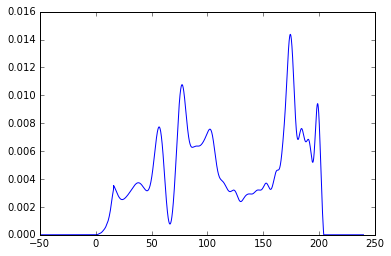

In [38]:
plt.figure()
plt.plot(Eaxis_300, PtailRU_300)
# plt.plot(Eaxis_300, RU_300)
plt.show()

In [39]:
a0_130 = 0.0020735832594
a1_130 = .00156210013
a2_130 = 50.9 #86453189362e-06 #4.86453189362e-06
cutEnergy=30
cutIndex_130=(cutEnergy+negAxis_130)*spacing
PtailRU_130= tailParabola (g1_130,RU_130,cutIndex_130, a2_130 )

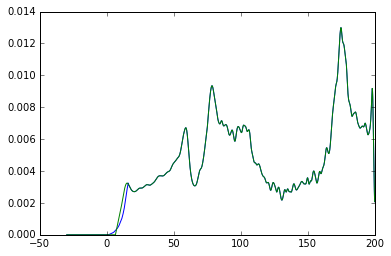

In [40]:
plt.figure()
plt.plot(Eaxis_130, PtailRU_130)
plt.plot(Eaxis_130, RU_130)
plt.show()

In [41]:
a0_30 = 0.0020735832594
a1_30 = .00156210013
a2_30 = 50.9 #86453189362e-06 #4.86453189362e-06
cutEnergy=10
cutIndex_30=(cutEnergy+negAxis_30)*spacing
PtailRU_30= tailParabola (g1_30,RU_30,cutIndex_30, a2_30 )

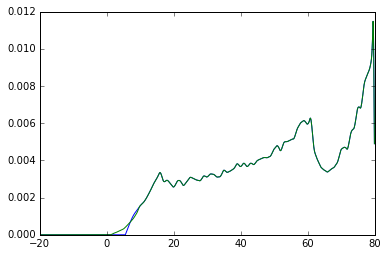

In [42]:
plt.figure()
plt.plot(Eaxis_30, RU_30)
plt.plot(Eaxis_30, PtailRU_30)

# plt.plot(Eaxis_30, g1_30)
plt.show()

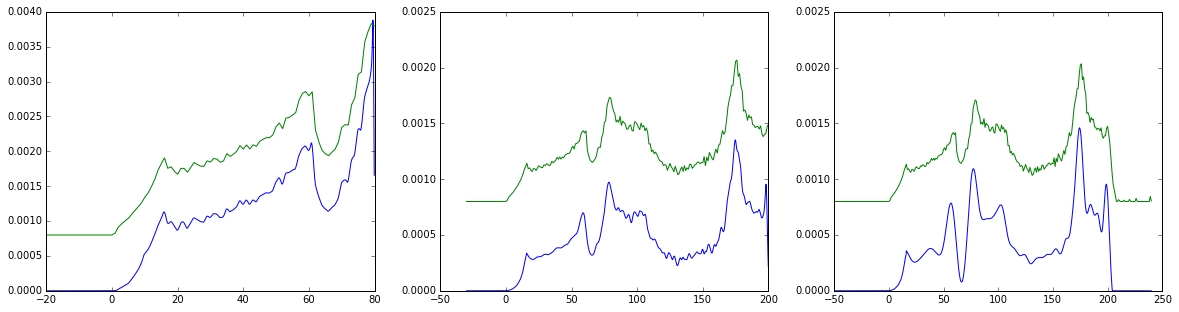

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(Eaxis_30, PtailRU_30/PtailRU_30.sum())
plt.plot(Eaxis_30, g1_30/g1_30.sum()+0.0008)
plt.subplot(1,3,2)
plt.plot(Eaxis_130, PtailRU_130/PtailRU_130.sum())
plt.plot(Eaxis_130, g1_130/g1_130.sum()+0.0008)
plt.subplot(1,3,3)
plt.plot(Eaxis_300, PtailRU_300/PtailRU_300.sum())
plt.plot(Eaxis_300, g1_300/g1_300.sum()+0.0008)
plt.show()
# plt.plot(Eaxis,y_delta/y_delta.sum())

In [44]:
com=np.concatenate((PtailRU_30[0:(20+negAxis_30)*spacing], RU_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing],RU_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing] ))

In [45]:
Eaxis=np.concatenate((Eaxis_30[0:(20+negAxis_30)*spacing], Eaxis_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing],Eaxis_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing] ))

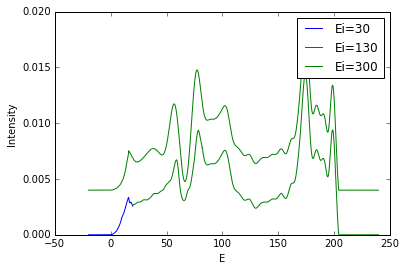

In [46]:
plt.figure()
plt.plot(Eaxis_30[0:(20+negAxis_30)*spacing],PtailRU_30[0:(20+negAxis_30)*spacing] , label='Ei=30')
plt.plot(Eaxis_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing], RU_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing], label='Ei=130')
plt.plot(Eaxis_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing], RU_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing], label='Ei=300', color='green')
plt.plot(Eaxis_300[(-20+negAxis_300)*spacing::],PtailRU_300[(-20+negAxis_300)*spacing::]+0.004, color='green')
plt.ylabel('Intensity')
plt.xlabel('E')
plt.legend(fontsize='large')
plt.show()

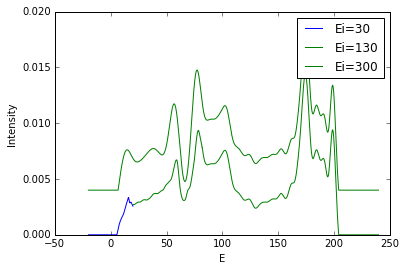

In [47]:
plt.figure()
plt.plot(Eaxis_30[0:(20+negAxis_30)*spacing],RU_30[0:(20+negAxis_30)*spacing] , label='Ei=30')
plt.plot(Eaxis_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing], RU_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing], label='Ei=130')
plt.plot(Eaxis_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing], RU_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing], label='Ei=300', color='green')
plt.plot(Eaxis_300[(-20+negAxis_300)*spacing::],RU_300[(-20+negAxis_300)*spacing::]+0.004, color='green')
plt.ylabel('Intensity')
plt.xlabel('E')
plt.legend(fontsize='large')
plt.show()

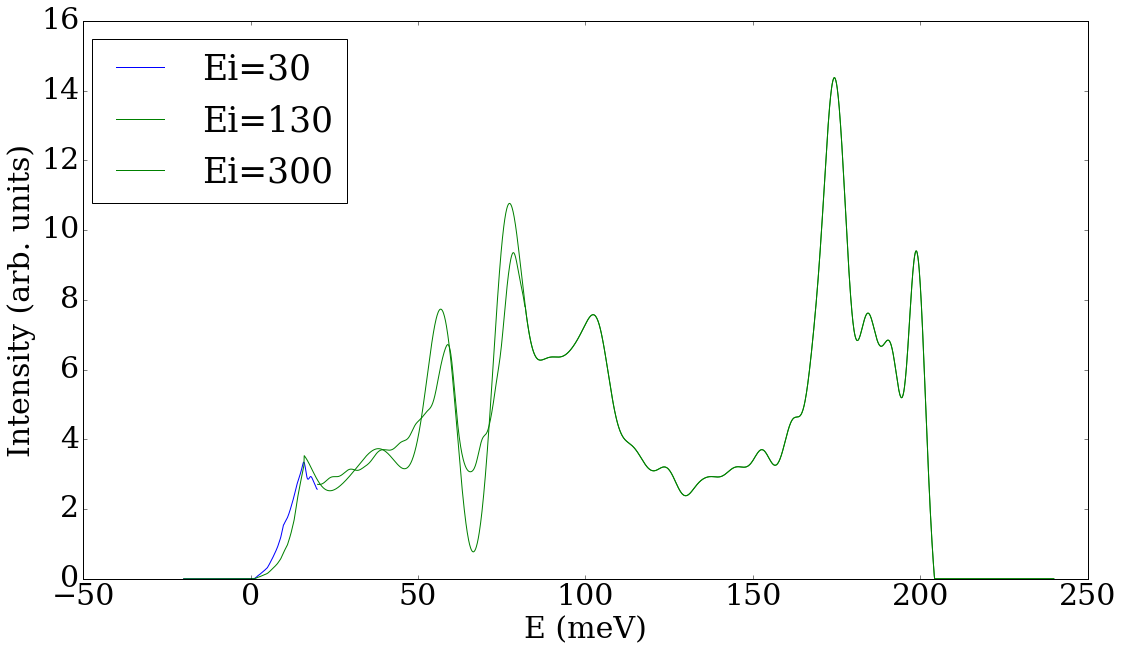

In [48]:
step=40
fontsze=30
plt.figure(figsize=(18,10))
plt.rc('font', size=20)
plt.plot((Eaxis_30[0:(20+negAxis_30)*spacing]),(PtailRU_30[0:(20+negAxis_30)*spacing])*1000 , fillstyle='none', label='Ei=30')
plt.plot((Eaxis_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing]), (RU_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing])*1000,fillstyle='none' ,label='Ei=130')
plt.plot((Eaxis_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing]), (RU_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing])*1000,fillstyle='none', label='Ei=300', color='green')
plt.plot((Eaxis_300[(-20+negAxis_300)*spacing::]),(PtailRU_300[(-20+negAxis_300)*spacing::])*1000,fillstyle='none', color='green')


plt.legend( fontsize=fontsze,bbox_to_anchor=(0.28, 0.999),prop={'family': 'serif','size':'xx-large'})
plt.xlabel('E (meV)', fontsize=fontsze,family='serif')
plt.xticks(fontsize=fontsze,family='serif')
plt.ylabel('Intensity (arb. units)',fontsize=fontsze,family='serif')
plt.yticks(fontsize=fontsze,family='serif')
# plt.show()

plt.savefig('Eis_different.eps',  dpi=1000)

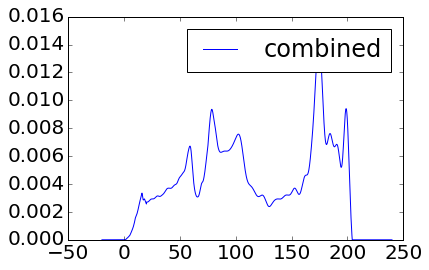

In [49]:
plt.figure()
plt.plot(Eaxis,com, label='combined')
# plt.plot(Eaxis_300,RU_300, label='300')
plt.legend()
plt.show()

In [50]:
Eaxis.shape

(2600,)

In [51]:
g1_com=np.concatenate((g1_30[0:(20+negAxis_30)*spacing], g1_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing],g1_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing] ))

In [52]:
print (g1_com.shape)

(2600,)


# Bregman Split

In [53]:
reload (spbs)

<module 'srins.powder.bregmanSplit' from '/home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/bregmanSplit.pyc'>

In [54]:
maxit=500

In [55]:
%%time
for _ in range(1000):
    recSplit_30, itS_30= spbs.split_Bregman(g1_30, res_mat30, ini_vZ_30, ini_uZ_30, neu_N_30, max_delta_30, value_30, maxit)

CPU times: user 13.3 s, sys: 10.3 s, total: 23.6 s
Wall time: 738 ms


In [56]:
%%time
for _ in range(1000):
    recSplit_130, itS_130= spbs.split_Bregman(g1_130, res_mat130, ini_vZ_130, ini_uZ_130, neu_N_130, max_delta_130, value_130, maxit)

CPU times: user 2min 25s, sys: 41.3 s, total: 3min 6s
Wall time: 5.83 s


In [57]:
%%time
for _ in range(1000):
    recSplit_300, itS_300= spbs.split_Bregman(g1_300, res_mat300, ini_vZ_300, ini_uZ_300, neu_N_300, max_delta_300, value_300, 20)

CPU times: user 1h 47min 46s, sys: 36min 38s, total: 2h 24min 24s
Wall time: 4min 30s


In [58]:
print (neu_N_300, delta_300, value_300, max_delta_300)

0.00300857296627 0.979714902076 0.000215776155337 1.95942980415


In [59]:
print (itS_30, itS_130,itS_300)

1 1 20


In [60]:
PtailrecSplit_30= tailParabola (recSplit_30,recSplit_30,cutIndex_30, a2_30 )

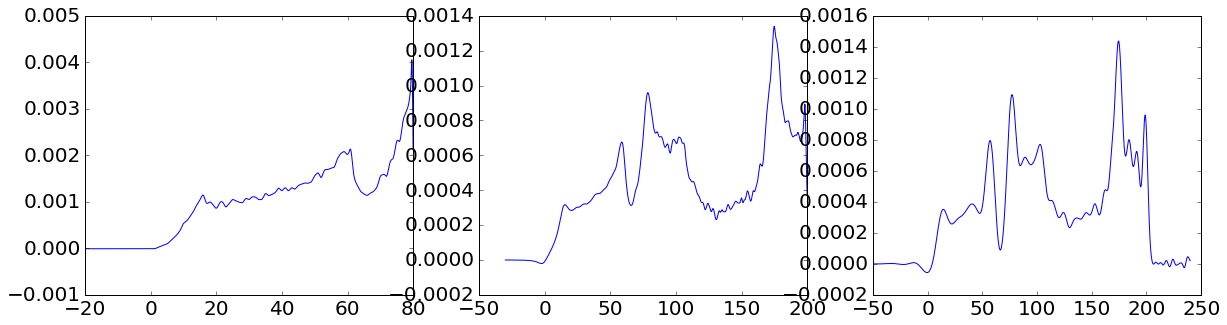

In [61]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(Eaxis_30, PtailrecSplit_30/np.sum(PtailrecSplit_30))
plt.subplot(1,3,2)
plt.plot(Eaxis_130, recSplit_130/np.sum(recSplit_130))
plt.subplot(1,3,3)
plt.plot(Eaxis_300, recSplit_300/np.sum(recSplit_300))
plt.show()

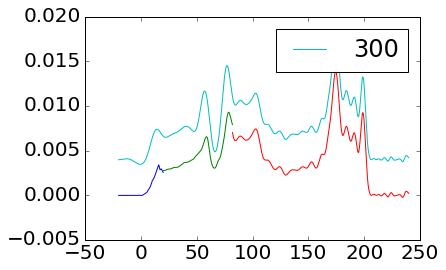

In [62]:
plt.figure()
plt.plot(Eaxis_30[0:(20+negAxis_30)*spacing],PtailrecSplit_30[0:(20+negAxis_30)*spacing] )
plt.plot(Eaxis_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing], recSplit_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing])
plt.plot(Eaxis_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing], recSplit_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing])
plt.plot(Eaxis_300[(-20+negAxis_300)*spacing::],recSplit_300[(-20+negAxis_300)*spacing::]+0.004, label='300')
plt.legend()
plt.show()

In [63]:
recSplit_com=np.concatenate((PtailrecSplit_30[0:(20+negAxis_30)*spacing], recSplit_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing],recSplit_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing] ))

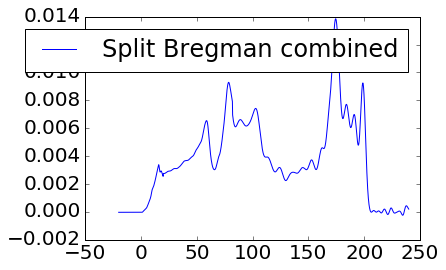

In [64]:
plt.figure()
plt.plot(Eaxis,recSplit_com, label='Split Bregman combined')
# plt.plot(Eaxis_300,RU_300, label='300')
plt.legend()
plt.show()

# Lucy Richardson

In [65]:
!rm /home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/Lucy_Richardson.pyc
reload(LR)

<module 'srins.powder.Lucy_Richardson' from '/home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/Lucy_Richardson.py'>

In [66]:
ini1_30=(np.sum(g1_30,0)/len(g1_30)) * np.ones(len(g1_30))#initial guess
ini1_130=(np.sum(g1_130,0)/len(g1_130)) * np.ones(len(g1_130))
ini1_300=(np.sum(g1_300,0)/len(g1_300)) * np.ones(len(g1_300))

In [67]:
%%time
for _ in range(1000):
    R_30,E_30,EB_30,In_30=LR.deconvolve_NS(g1_30, res_mat30, ini1_30, 'errorModel', value_30,maxIter=maxit)

CPU times: user 6.38 s, sys: 5.46 s, total: 11.8 s
Wall time: 371 ms


In [68]:
%%time
for _ in range(1000):
    R_130,E_130,EB_130,In_130=LR.deconvolve_NS(g1_130, res_mat130, ini1_130, 'errorModel', value_130,maxIter=maxit)

CPU times: user 1min 59s, sys: 40.5 s, total: 2min 39s
Wall time: 4.99 s


In [69]:
%%time
for _ in range(1000):
    R_300,E_300,EB_300,In_300=LR.deconvolve_NS(g1_300, res_mat300, ini1_300, 'errorModel', value_300,maxIter=maxit)

CPU times: user 1h 2min 33s, sys: 19min 23s, total: 1h 21min 57s
Wall time: 2min 33s


In [70]:
print ('no of iteration for Lucy Richardson: ', In_30, In_130, In_300)

no of iteration for Lucy Richardson:  1 2 23


In [71]:
PtailR_30= tailParabola (R_30,R_30,cutIndex_30, a2_30 )

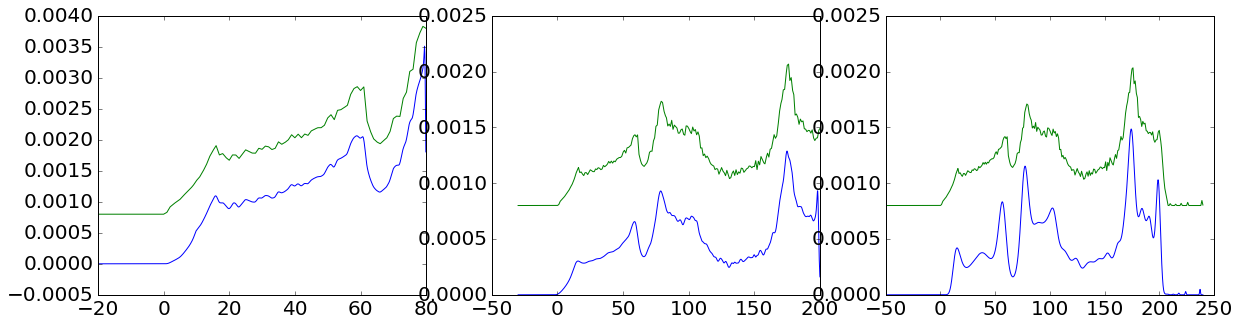

In [72]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(Eaxis_30, PtailR_30/PtailR_30.sum())
plt.plot(Eaxis_30, g1_30/g1_30.sum()+0.0008)
plt.subplot(1,3,2)
plt.plot(Eaxis_130, R_130/R_130.sum())
plt.plot(Eaxis_130, g1_130/g1_130.sum()+0.0008)
plt.subplot(1,3,3)
plt.plot(Eaxis_300, R_300/R_300.sum())
plt.plot(Eaxis_300, g1_300/g1_300.sum()+0.0008)
plt.show()

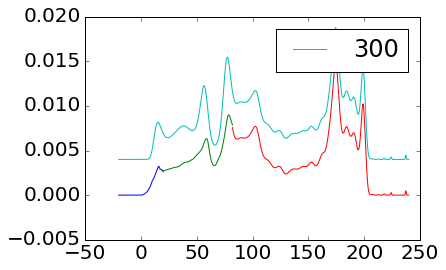

In [73]:
plt.figure()
plt.plot(Eaxis_30[0:(20+negAxis_30)*spacing],PtailR_30[0:(20+negAxis_30)*spacing] )
plt.plot(Eaxis_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing], R_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing])
plt.plot(Eaxis_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing], R_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing])
plt.plot(Eaxis_300[(-20+negAxis_300)*spacing::],R_300[(-20+negAxis_300)*spacing::]+0.004, label='300')
plt.legend()
plt.show()

In [74]:
R_com=np.concatenate((PtailR_30[0:(20+negAxis_30)*spacing], R_130[(20+negAxis_130)*spacing:(82+negAxis_130)*spacing],R_300[(82+negAxis_300)*spacing:(250+negAxis_300)*spacing] ))

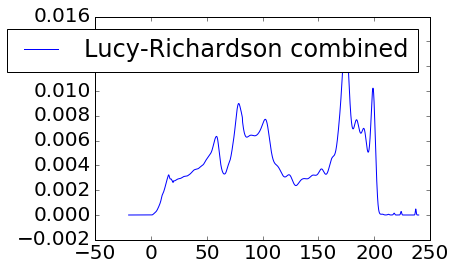

In [75]:
plt.figure()
plt.plot(Eaxis,R_com, label='Lucy-Richardson combined')
# plt.plot(Eaxis_300,RU_300, label='300')
plt.legend()
plt.show()

# Reading  saved DFT file 

In [76]:
from pylab import genfromtxt;
read_DFT_dat=genfromtxt("DFT.dat")

# Padding the DFT data

In [77]:
# RF3_read = np.load("res_matrix_Ei_300.npy")

# horizontal_frnt_addition=np.arange(-50,0.0,0.1)
# horizontal_back_addition=np.arange(205,240,0.1)

# read_DFT_x=np.concatenate((horizontal_frnt_addition,read_DFT_dat[:,0], horizontal_back_addition))

# len_DFT=len (read_DFT_dat[:,1])

# len_RF_row=RF3_read.shape[0]


# diff=np.abs(len_RF_row-len_DFT)

# if (diff%2==0):
#     start=(diff/2)-1
# else:
#     start=(diff)/2
# print (start)
# new_sigC=np.concatenate((np.concatenate ((np.zeros(int(start)), read_DFT_dat[:,1])), np.zeros(int(diff-start))))

# plt.figure('DFT')
# plt.suptitle('DFT')
# plt.plot(read_DFT_x, new_sigC)
# plt.xlabel('energy')
# plt.ylabel('intensity')
# plt.show()
    

In [78]:
# DFT=np.interp(Eaxis, read_DFT_x, new_sigC)

In [79]:
DFT=np.interp(Eaxis, read_DFT_dat[:,0], read_DFT_dat[:,1])

In [80]:
num=np.arange(0,g1_com.shape[0], 1)
Enew=Eaxis.copy()

In [81]:
Enew[(0)*spacing:(50+20)*spacing]=np.nan
Enew[(50+20)*spacing::]=np.nan
Enew[(50+20)*spacing]=12

In [82]:
Eaxis[50*spacing]

30.000000000000853

<IPython.core.display.Javascript object>


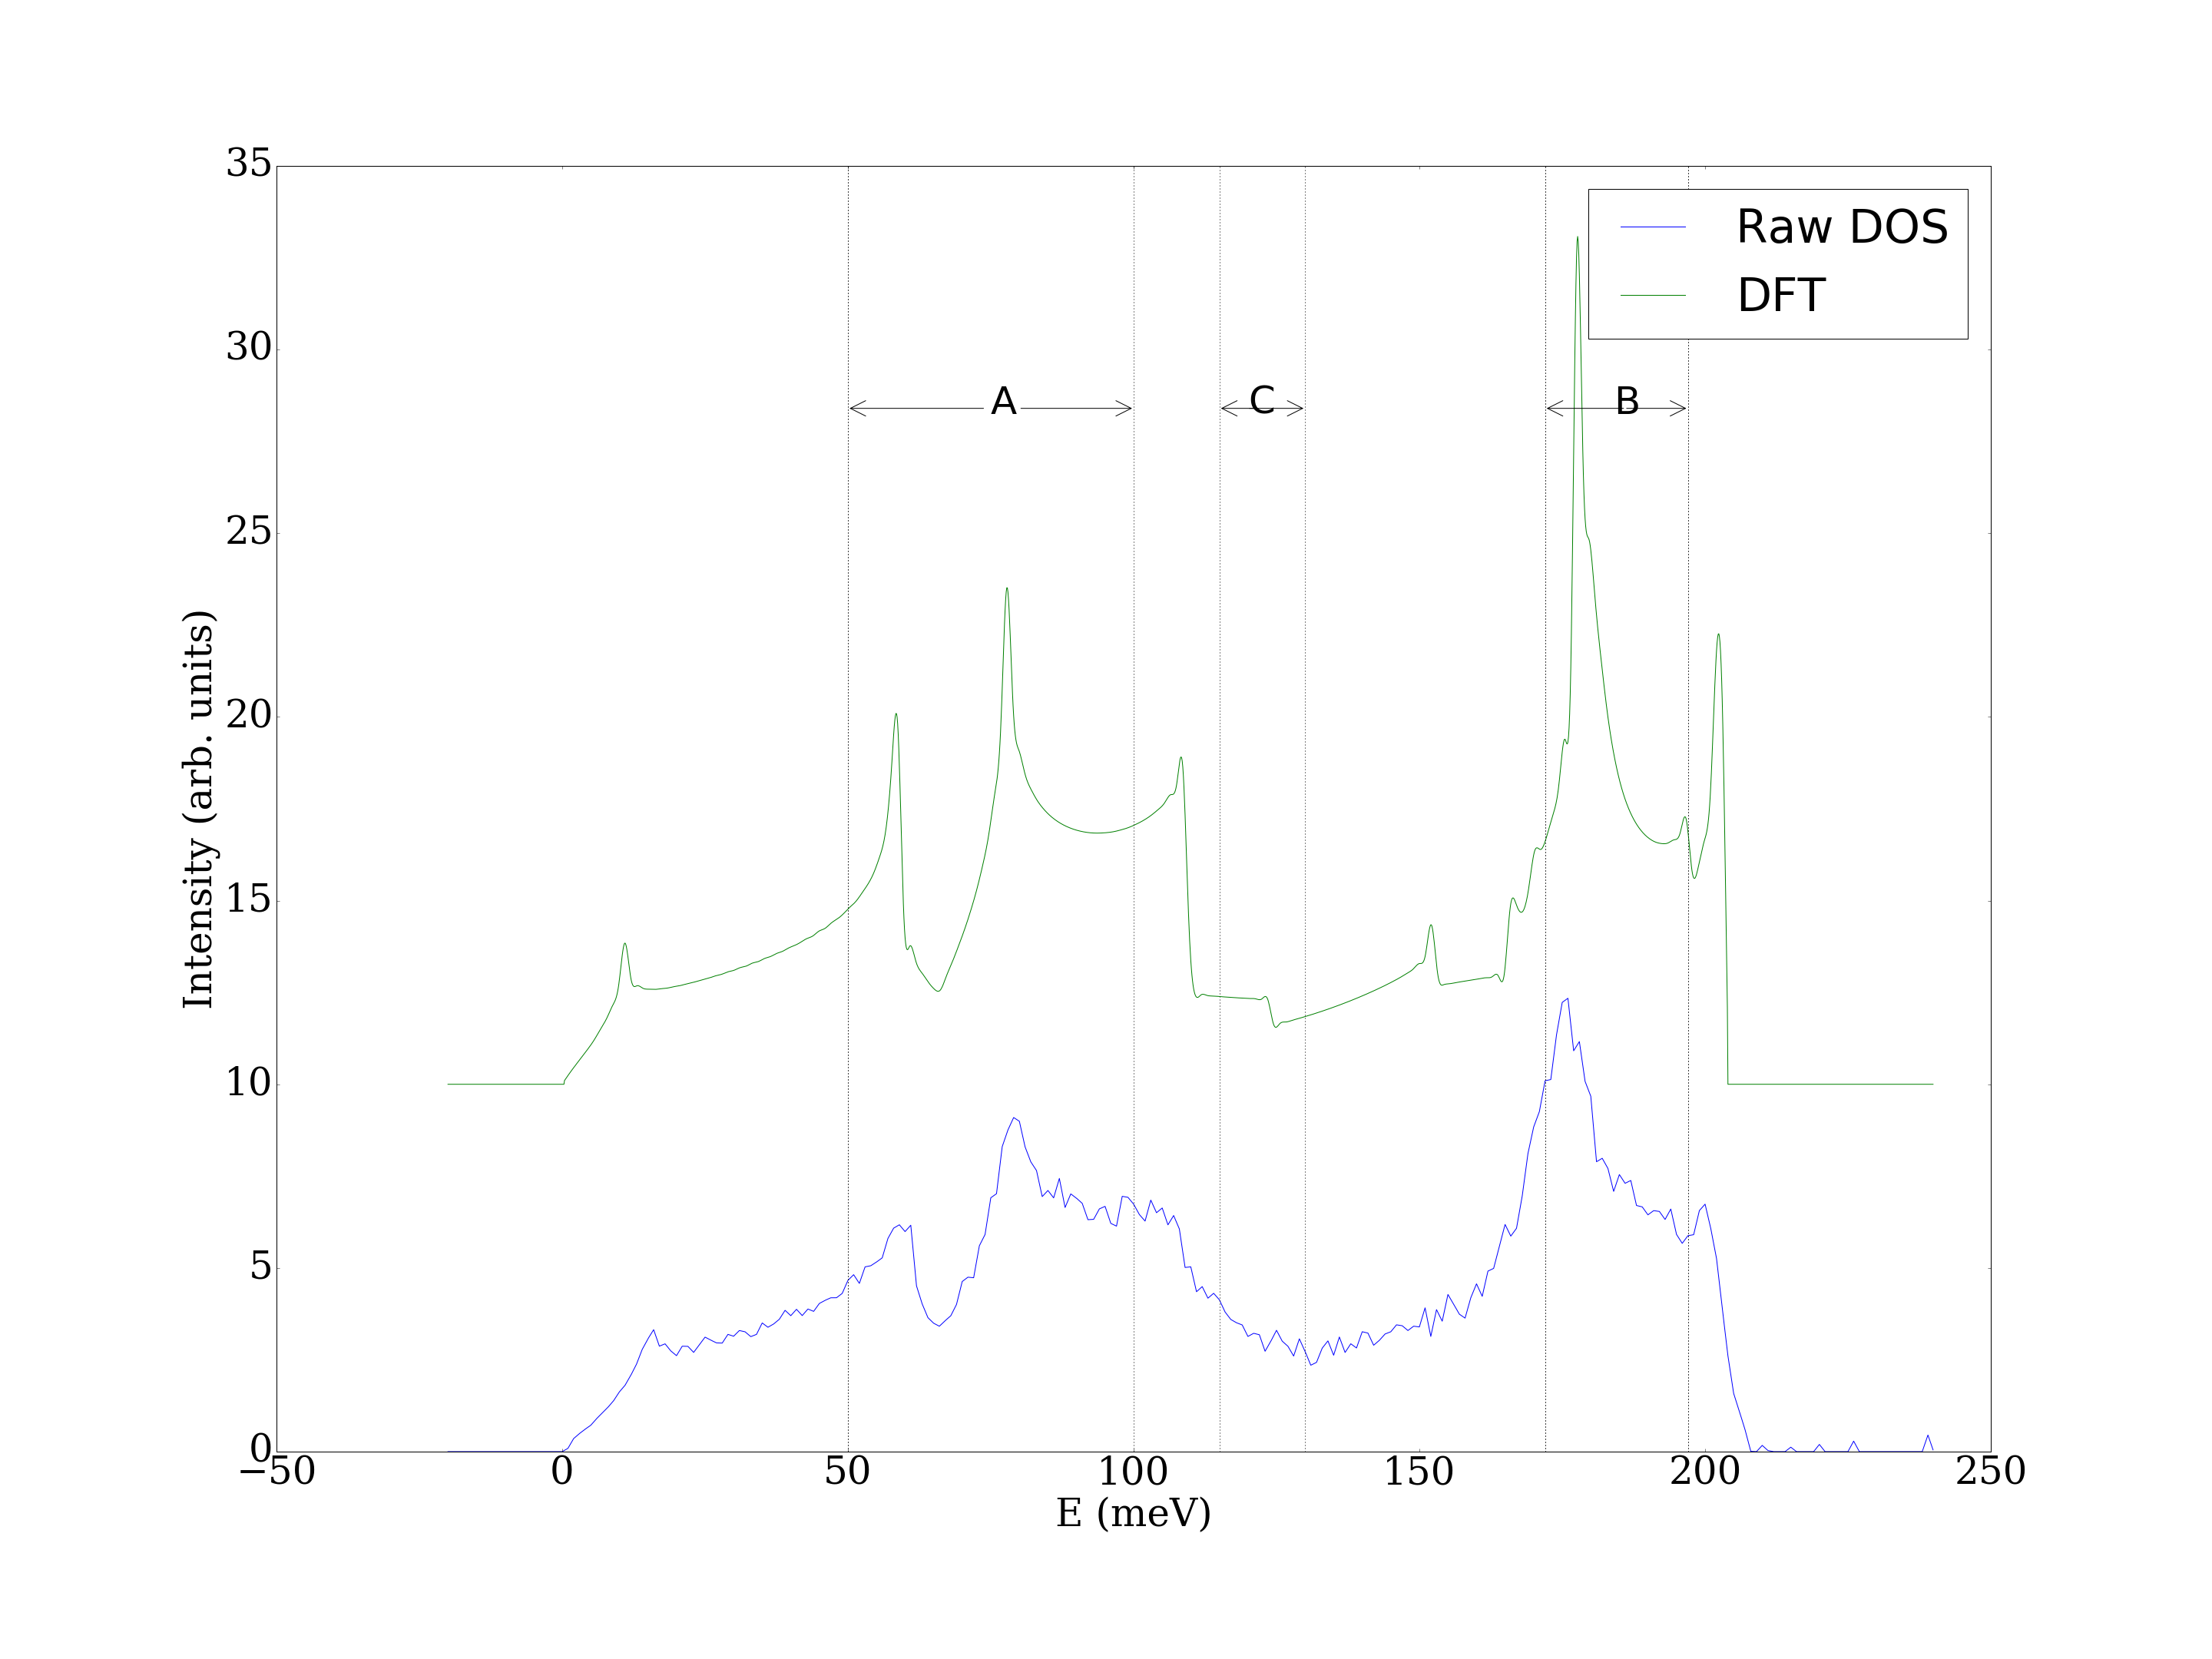

In [90]:
%matplotlib notebook
plt.figure(figsize=(40,30))
s=50
plt.rc('font', size=s)
# plt.subplot(2,1,1)
# plt.plot(Eaxis[50*spacing])
plt.plot(Eaxis,(g1_com/g1_com.sum())*10000, label='Raw DOS')
plt.axvline(x=Eaxis[(50+20)*spacing],color='k',linewidth=1, linestyle=':')
# plt.text(75, 10.25, 'A', fontsize=s)
# plt.annotate("", xy=(50,10.4),xytext=(74, 10.4),arrowprops=dict(arrowstyle="->"))
# plt.annotate("", xy=(108,10.4),xytext=(80, 10.4),arrowprops=dict(arrowstyle="->"))
plt.axvline(x=Eaxis[(115+20)*spacing],c='k',linewidth=1, linestyle=':')
plt.axvline(x=Eaxis[(172+20)*spacing],c='k',linewidth=1, linestyle=':')
# plt.text(184, 10.25, 'B', fontsize=s)
# plt.annotate("", xy=(172,10.4),xytext=(186, 10.4),arrowprops=dict(arrowstyle="->"))
# plt.annotate("", xy=(197,10.4),xytext=(186, 10.4),arrowprops=dict(arrowstyle="->"))
plt.axvline(x=Eaxis[(197+20)*spacing],c='k',linewidth=1, linestyle=':')
# plt.axvline(x=Eaxis[(209+20)*spacing],c='k',linewidth=1, linestyle=':')
# plt.text(202, 10.25, 'C', fontsize=s)
# plt.annotate("", xy=(197,10.4),xytext=(202, 10.4),arrowprops=dict(arrowstyle="->"))
# plt.annotate("", xy=(209,10.4),xytext=(204, 10.4),arrowprops=dict(arrowstyle="->"))
plt.xlabel('E (meV)', fontsize=s, family='serif')
plt.xticks(fontsize=s,family='serif')
plt.ylabel('Intensity (arb. units)',fontsize=s,family='serif')
plt.yticks(fontsize=s,family='serif')


# plt.subplot(2,1,1)
plt.plot(Eaxis,(DFT/DFT.sum())*10000+spacing*1, label='DFT')
plt.axvline(x=Eaxis[(50+20)*spacing],color='k',linewidth=1, linestyle=':')
plt.text(75, 28.25, 'A', fontsize=s)
plt.annotate("", xy=(50,28.4),xytext=(74, 28.4),arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(100,28.4),xytext=(80, 28.4),arrowprops=dict(arrowstyle="->"))
plt.axvline(x=Eaxis[(100+20)*spacing],c='k',linewidth=1, linestyle=':')
plt.axvline(x=Eaxis[(172+20)*spacing],c='k',linewidth=1, linestyle=':')
plt.text(184, 28.25, 'B', fontsize=s)
plt.annotate("", xy=(172,28.4),xytext=(186, 28.4),arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(197,28.4),xytext=(186, 28.4),arrowprops=dict(arrowstyle="->"))
plt.axvline(x=Eaxis[(197+20)*spacing],c='k',linewidth=1, linestyle=':')
plt.axvline(x=Eaxis[(130+20)*spacing],c='k',linewidth=1, linestyle=':')
plt.text(120, 28.25, 'C', fontsize=s)
plt.annotate("", xy=(115,28.4),xytext=(122, 28.4),arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(130,28.4),xytext=(120, 28.4),arrowprops=dict(arrowstyle="->"))
plt.xlabel('E (meV)', fontsize=s, family='serif')
plt.xticks(fontsize=s,family='serif')
plt.ylabel('Intensity (arb. units)',fontsize=s,family='serif')
plt.yticks(fontsize=s,family='serif')
plt.legend()
plt.savefig('criticalFeatures.eps',  dpi=1000)

In [84]:
n1=RU_30.shape[0]
chi30_LB=np.sum((PtailRU_30/np.sum(PtailRU_30)-DFT[0:RU_30.shape[0]]/np.sum(DFT[0:RU_30.shape[0]]))**2)*n1
chi30_SB=np.sum((PtailrecSplit_30/np.sum(PtailrecSplit_30)-DFT[0:RU_30.shape[0]]/np.sum(DFT[0:RU_30.shape[0]]))**2)*n1
chi30_LR=np.sum((PtailR_30/np.sum(PtailR_30)-DFT[0:RU_30.shape[0]]/np.sum(DFT[0:RU_30.shape[0]]))**2)*n1

In [85]:
print (chi30_LR,chi30_LB,chi30_SB)

0.0768250051127 0.079080459704 0.0790325703198


In [86]:
n2=RU_130.shape[0]
chi130_LB=np.sum((RU_130/np.sum(RU_130)-DFT[0:RU_130.shape[0]]/np.sum(DFT[0:RU_130.shape[0]]))**2)*n2
chi130_SB=np.sum((recSplit_130/np.sum(recSplit_130)-DFT[0:RU_130.shape[0]]/np.sum(DFT[0:RU_130.shape[0]]))**2)*n2
chi130_LR=np.sum((R_130/np.sum(R_130)-DFT[0:RU_130.shape[0]]/np.sum(DFT[0:RU_130.shape[0]]))**2)*n2

In [87]:
print (chi130_LR,chi130_LB,chi130_SB)

0.392093894098 0.411807211635 0.411459349485


In [96]:
DFT_300=np.interp(Eaxis_300, read_DFT_dat[:,0], read_DFT_dat[:,1])

In [125]:
n3=DFT_300.shape[0]
n3

2900

In [126]:
chi300_LB=np.sum((RU_300/np.sum(RU_300)-DFT_300/np.sum(DFT_300))**2)*n3
chi300_SB=np.sum((recSplit_300/np.sum(recSplit_300)-DFT_300/np.sum(DFT_300))**2)*n3
chi300_LR=np.sum((R_300/np.sum(R_300)-DFT_300/np.sum(DFT_300))**2)*n3

In [127]:
print (chi300_LR,chi300_LB,chi300_SB)

0.273152673044 0.256481573579 0.258207559019


In [93]:
DFT.shape
com.shape

(2600,)

<IPython.core.display.Javascript object>


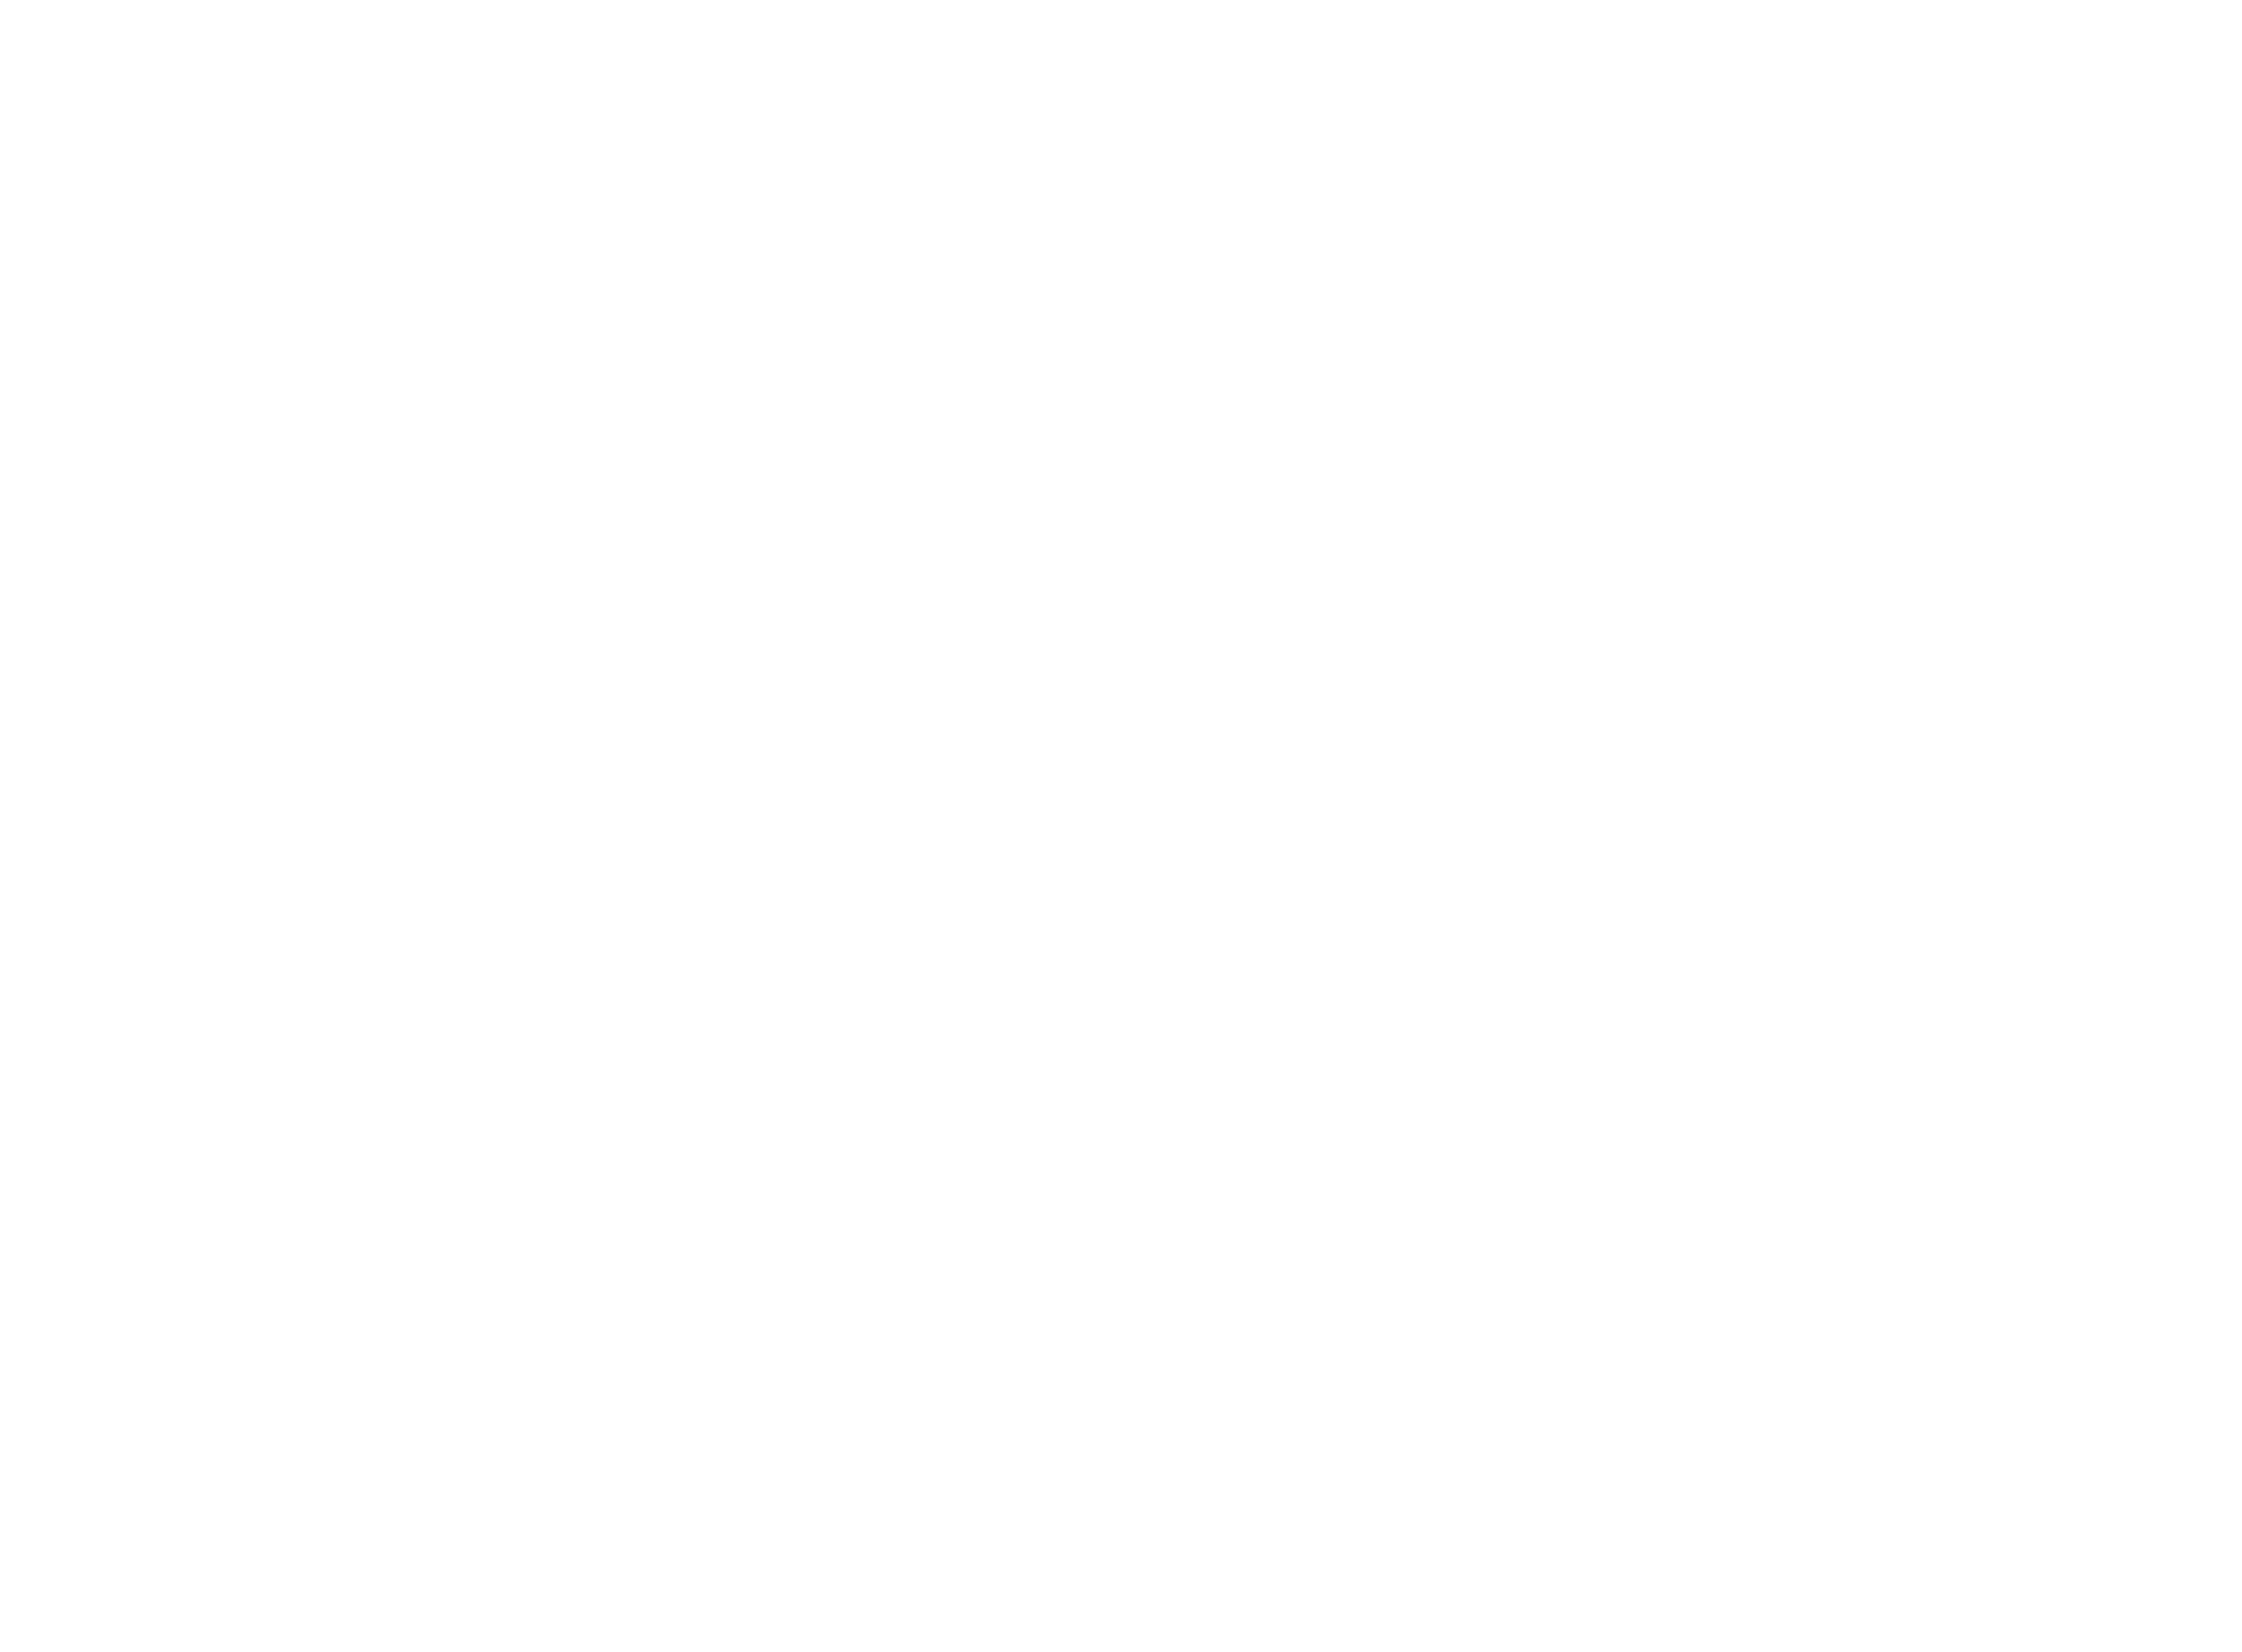

<IPython.core.display.Javascript object>


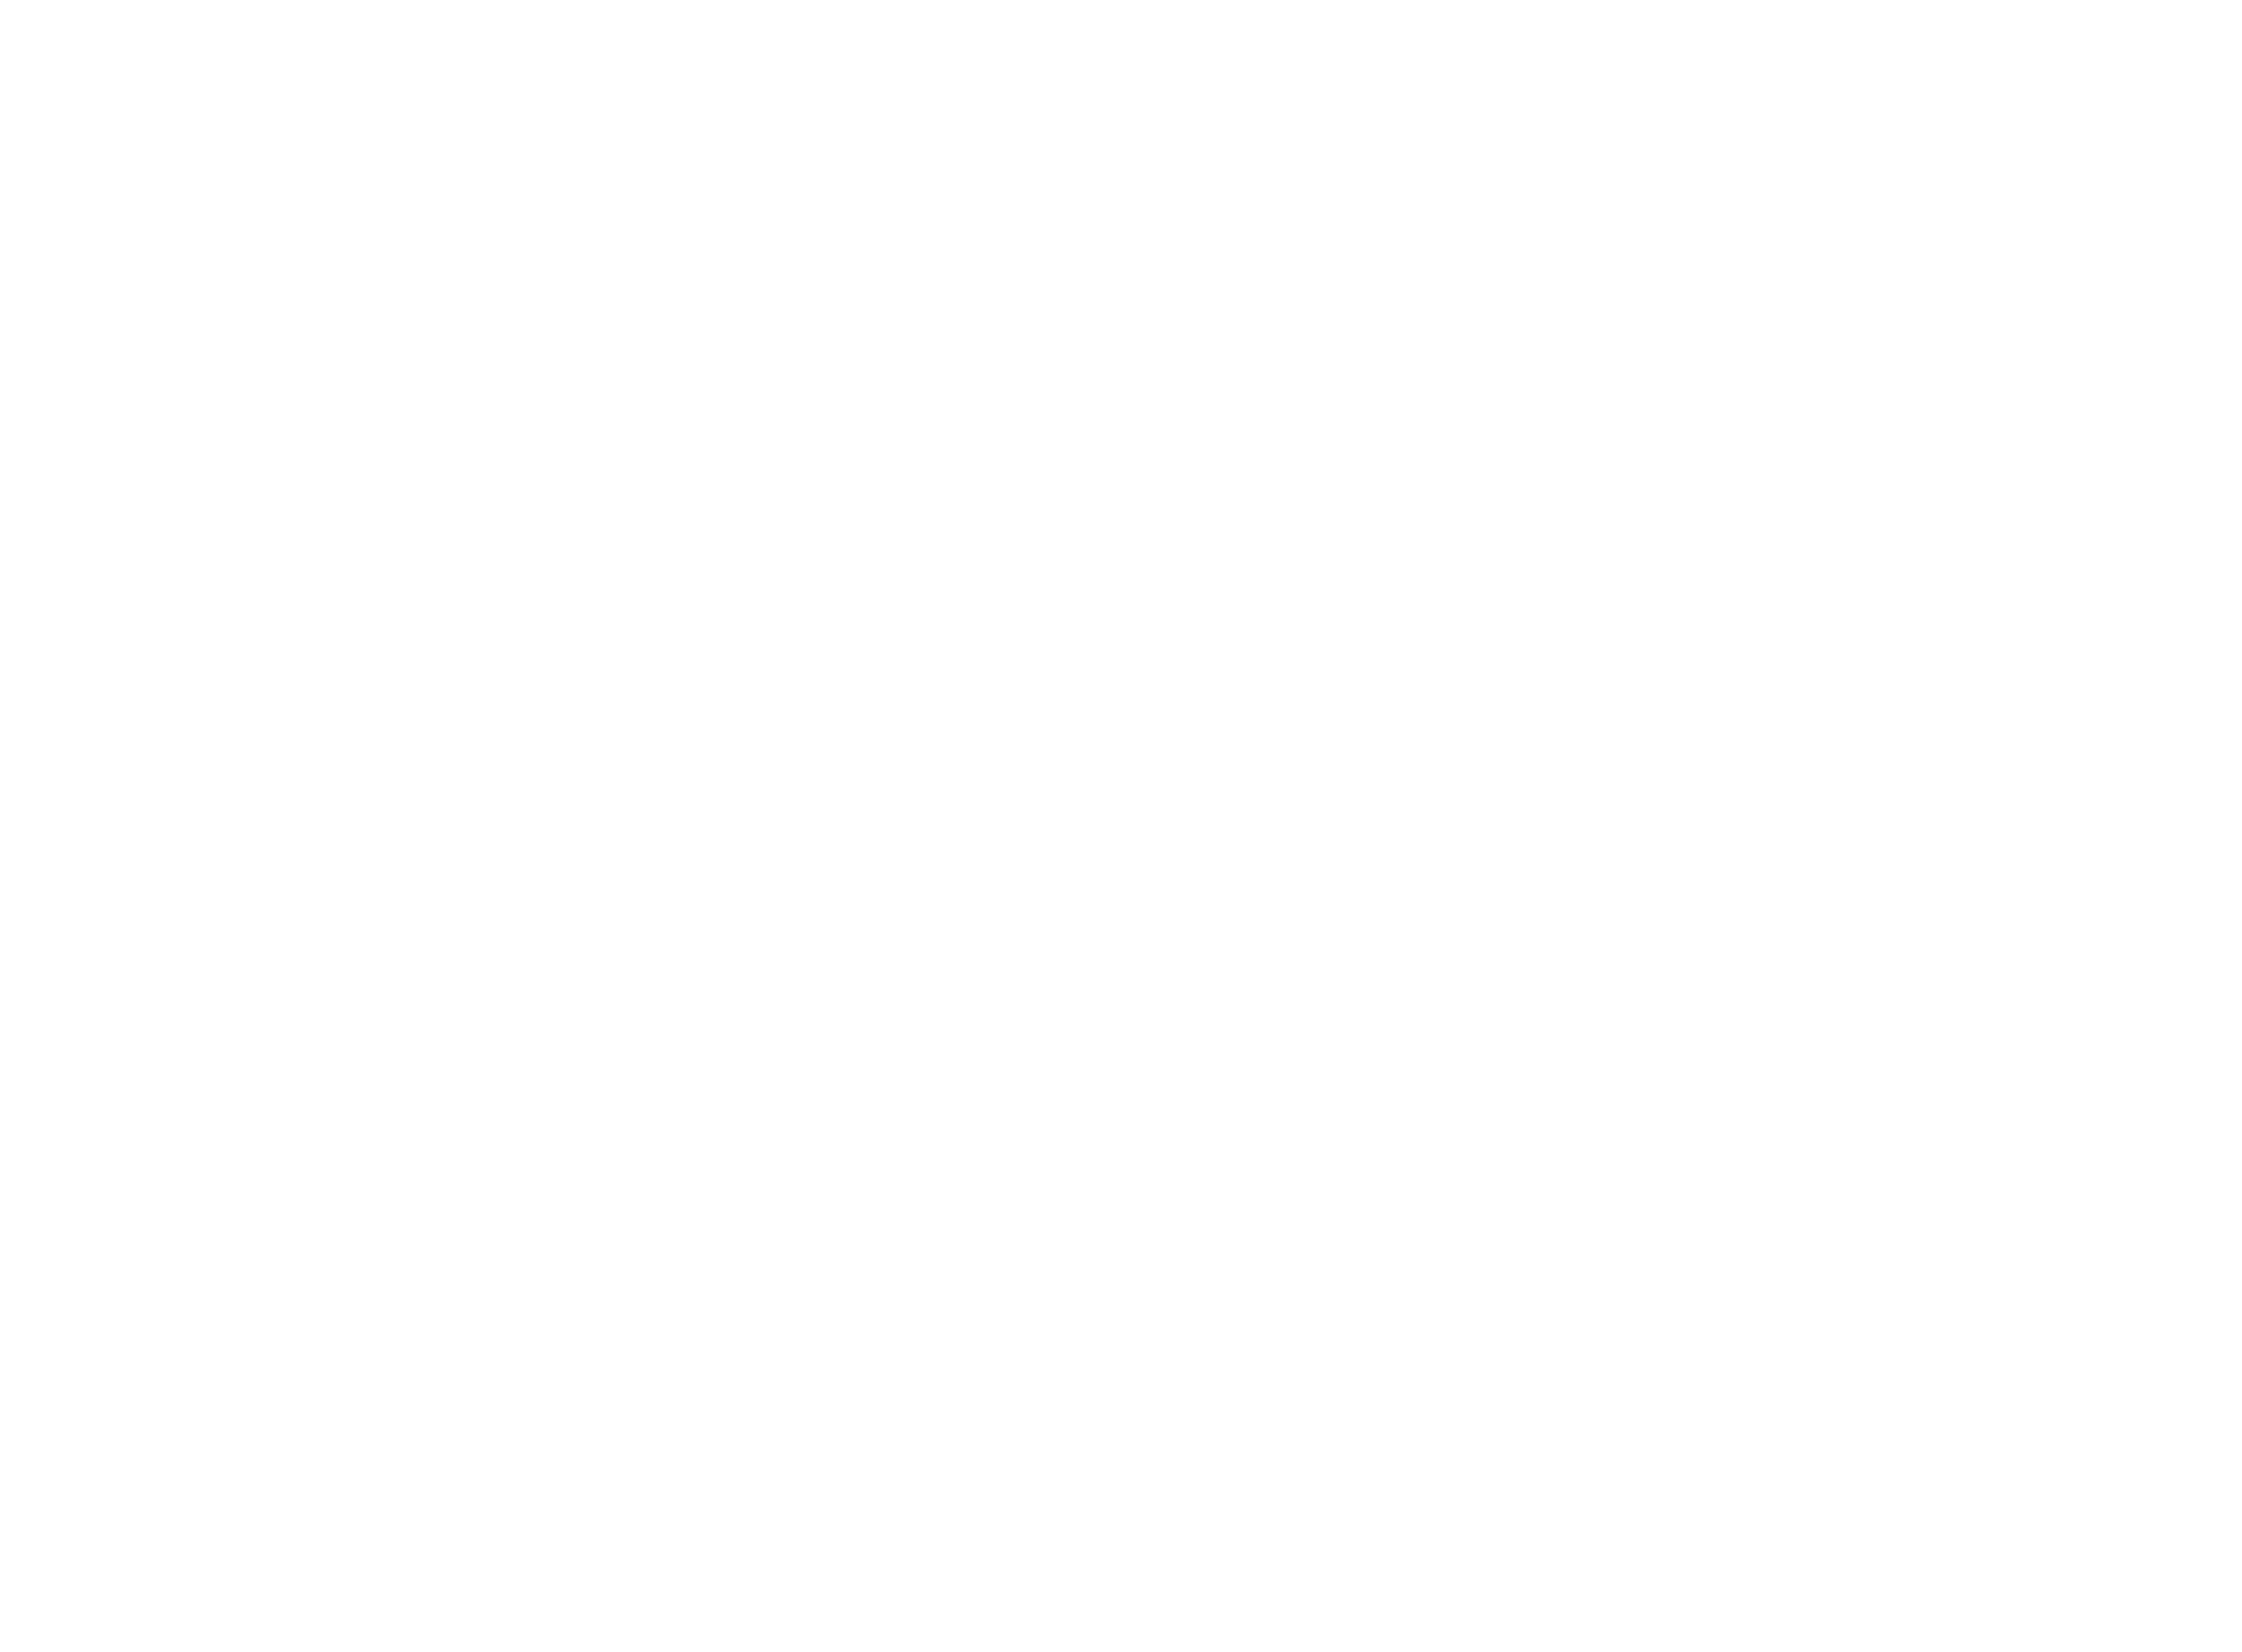

In [94]:
plt.figure(figsize=(38,28))
spacing = 3
fontsze=50
plt.rc('font', size=30)
plt.plot(Eaxis,(DFT/DFT.sum())*10000+spacing*4, label='DFT')
plt.plot(Eaxis,(com/com.sum())*10000+spacing*3, label='Linearized Bregman')
plt.plot(Eaxis,(R_com/R_com.sum())*10000+spacing*2, label='Lucy-Richardson')
plt.plot(Eaxis,(recSplit_com/recSplit_com.sum())*10000+spacing, label='Split Bregman')

plt.plot(Eaxis,(g1_com/g1_com.sum())*10000, label='Raw DOS')


plt.legend( fontsize=fontsze,bbox_to_anchor=(0.37, 0.999),prop={'family': 'serif','size':'xx-large'}) #'weight':'bold'
plt.xlabel('E (meV)', fontsize=fontsze, family='serif')
plt.xticks(fontsize=fontsze,family='serif')
plt.ylabel('Intensity (arb. units)',fontsize=fontsze,family='serif')
plt.yticks(fontsize=fontsze,family='serif')
# plt.show()
# plt.tight_layout(rect=[0.03, 0.03, .97, 0.97])
plt.savefig('DOS_different_flow2.eps',  dpi=1000)
# plt.show()

In [85]:
print (Eaxis.max())
print (Eaxis.min())
print (Eaxis[1]-Eaxis[0])

239.9
-20.0
0.1


<IPython.core.display.Javascript object>


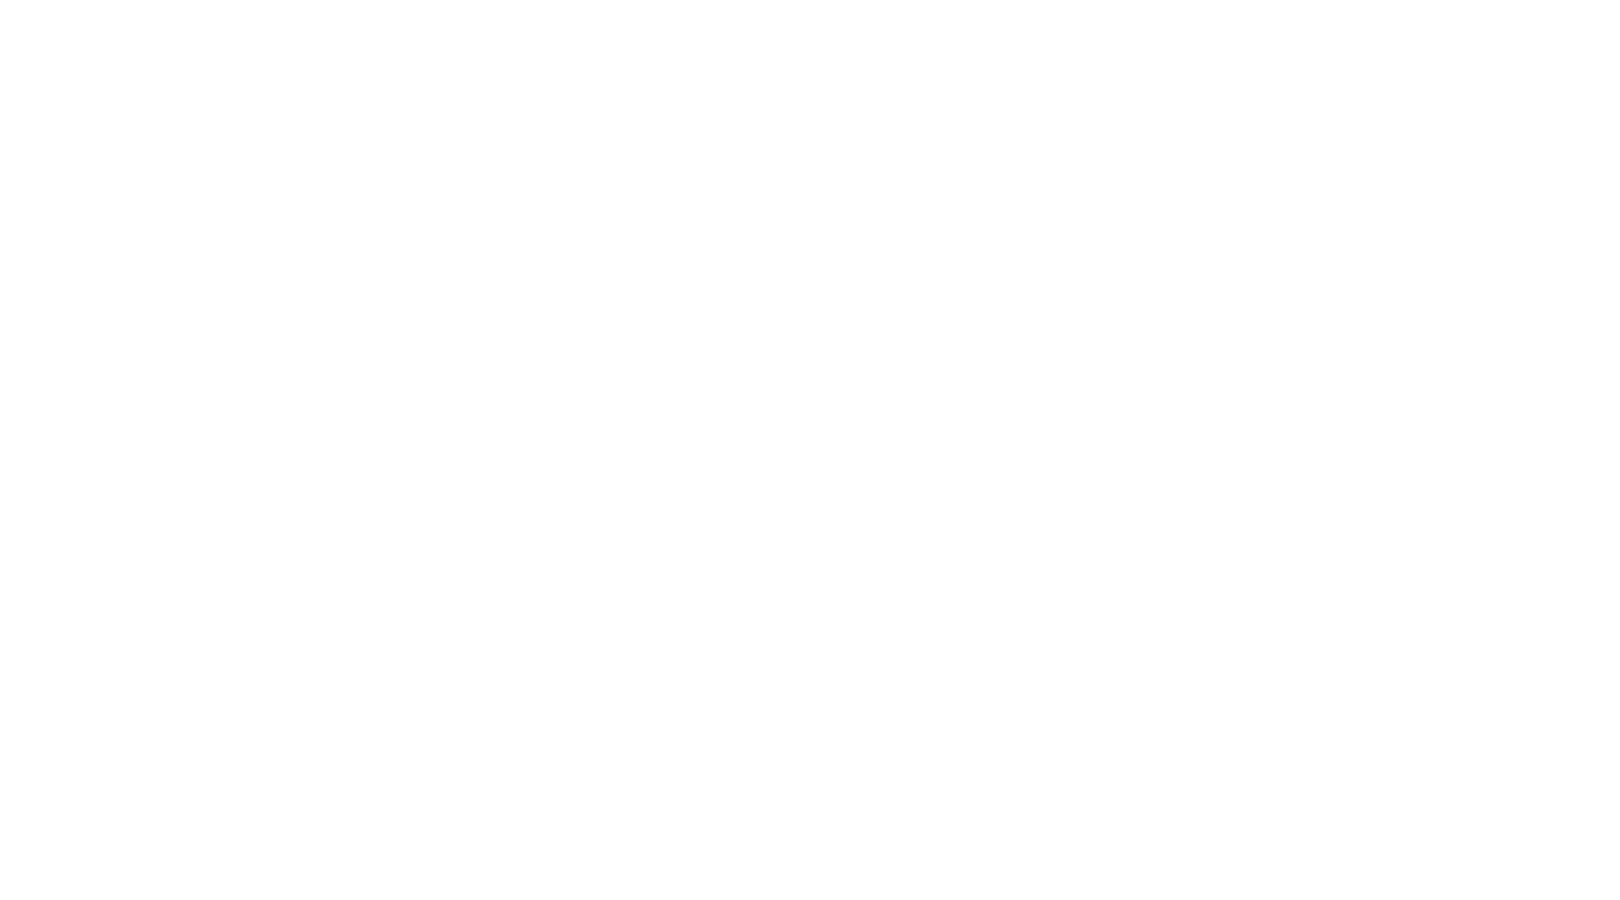

<IPython.core.display.Javascript object>


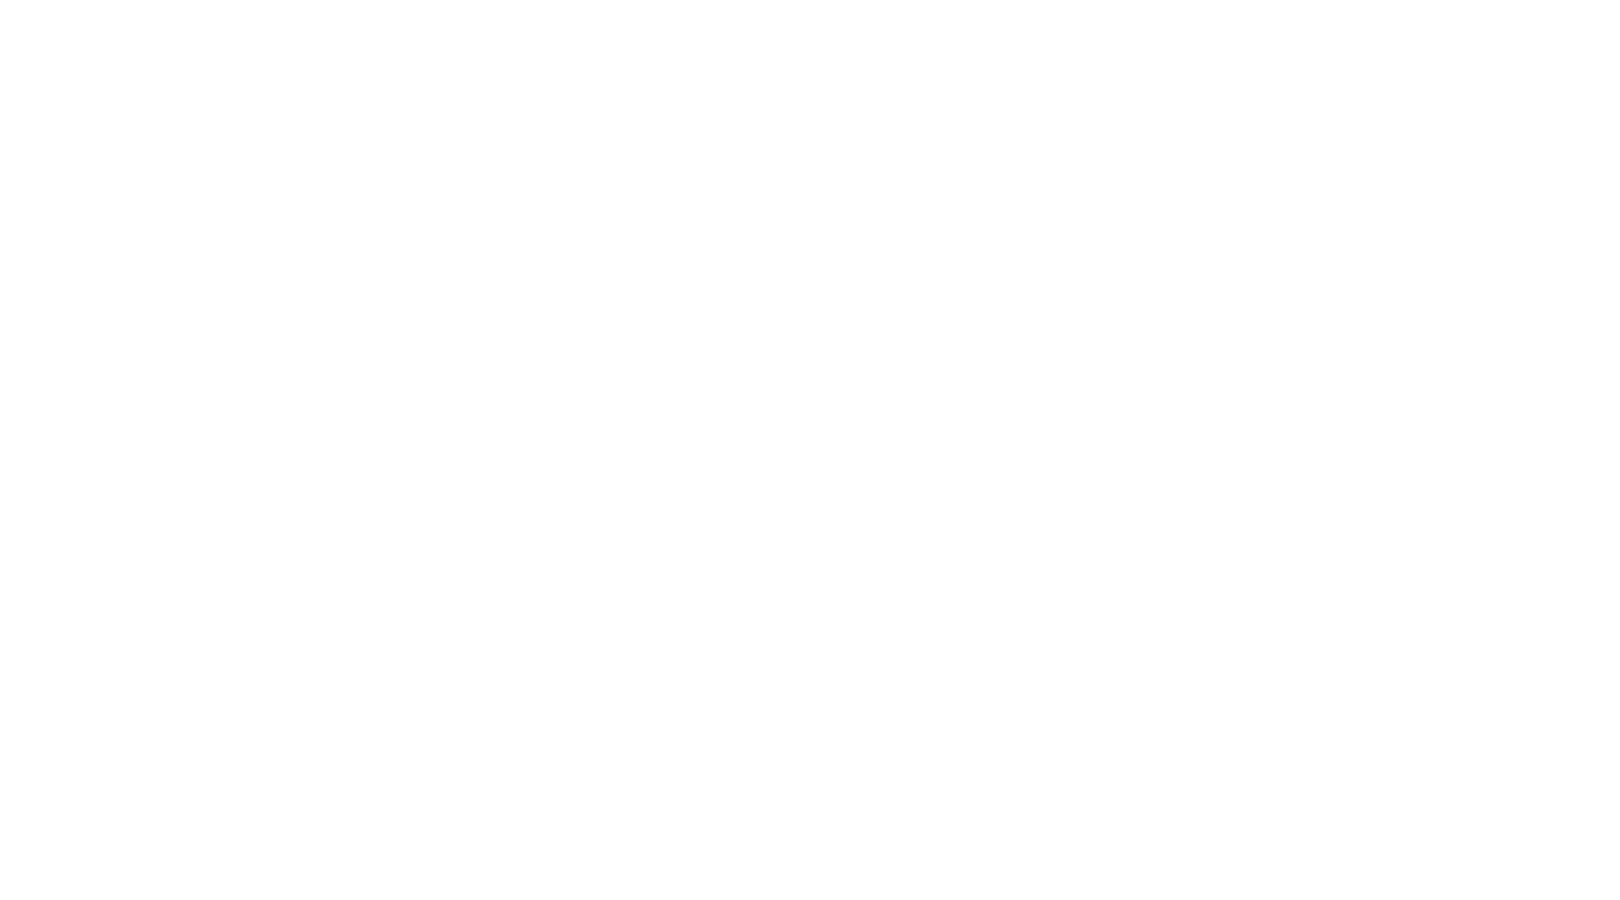

In [86]:
step=30
plt.figure(figsize=(18,10))
plt.plot(Eaxis,(DFT/DFT.sum())*10000, markersize=9,label='DFT')
plt.plot(Eaxis[::step],(com/com.sum())[::step]*10000,'+', fillstyle='none',markersize=15,label='Linearized Bregman')
plt.plot(Eaxis[::step],(recSplit_com/recSplit_com.sum())[::step]*10000,'o',fillstyle='none',markersize=9, label='Split Bregman')
plt.plot(Eaxis[::step],(R_com/R_com.sum())[::step]*10000, '^',fillstyle='none',markersize=9,label='Lucy-Richardson')
plt.plot(Eaxis,(g1_com/g1_com.sum())*10000,markersize=9, label='Raw DOS')

plt.legend( fontsize=fontsze,bbox_to_anchor=(0.29, 1),prop={'family': 'serif','size':'xx-large'})
plt.xlabel('E (meV)', fontsize=fontsze,family='serif')
plt.xticks(fontsize=fontsze,family='serif')
plt.ylabel('Intensity (arb. units)',fontsize=fontsze,family='serif')
plt.yticks(fontsize=fontsze,family='serif')
# plt.show()

plt.savefig('DOS_different.eps',  dpi=1000)

In [87]:
def gauss(x, amplitude, position, sigma):
    return amplitude/np.sqrt(2*np.pi)/sigma * np.exp( -(x-position)**2/2./sigma**2)

In [88]:
H=Eaxis

In [89]:
A=np.zeros((len(H),len(H)))
sig=2
for i, h in enumerate(H):
    A[i]=gauss(H, 1, h, sig)
print  (A.shape[1])

2600


In [90]:
DFT_convolvedGaus=np.dot(DFT, A)

<IPython.core.display.Javascript object>


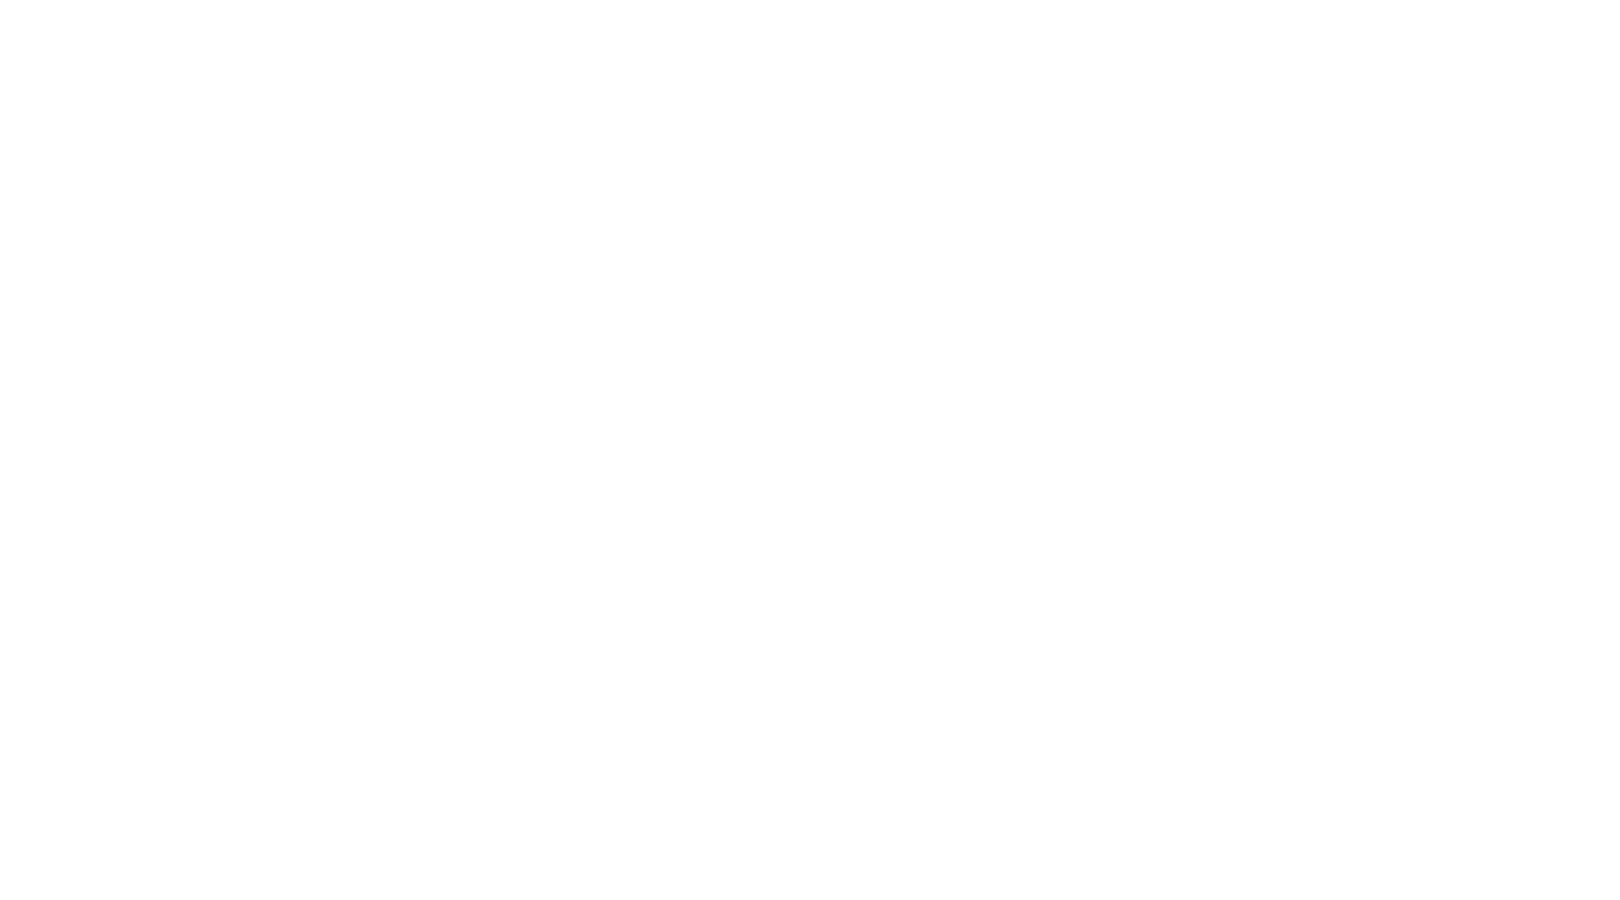

<IPython.core.display.Javascript object>


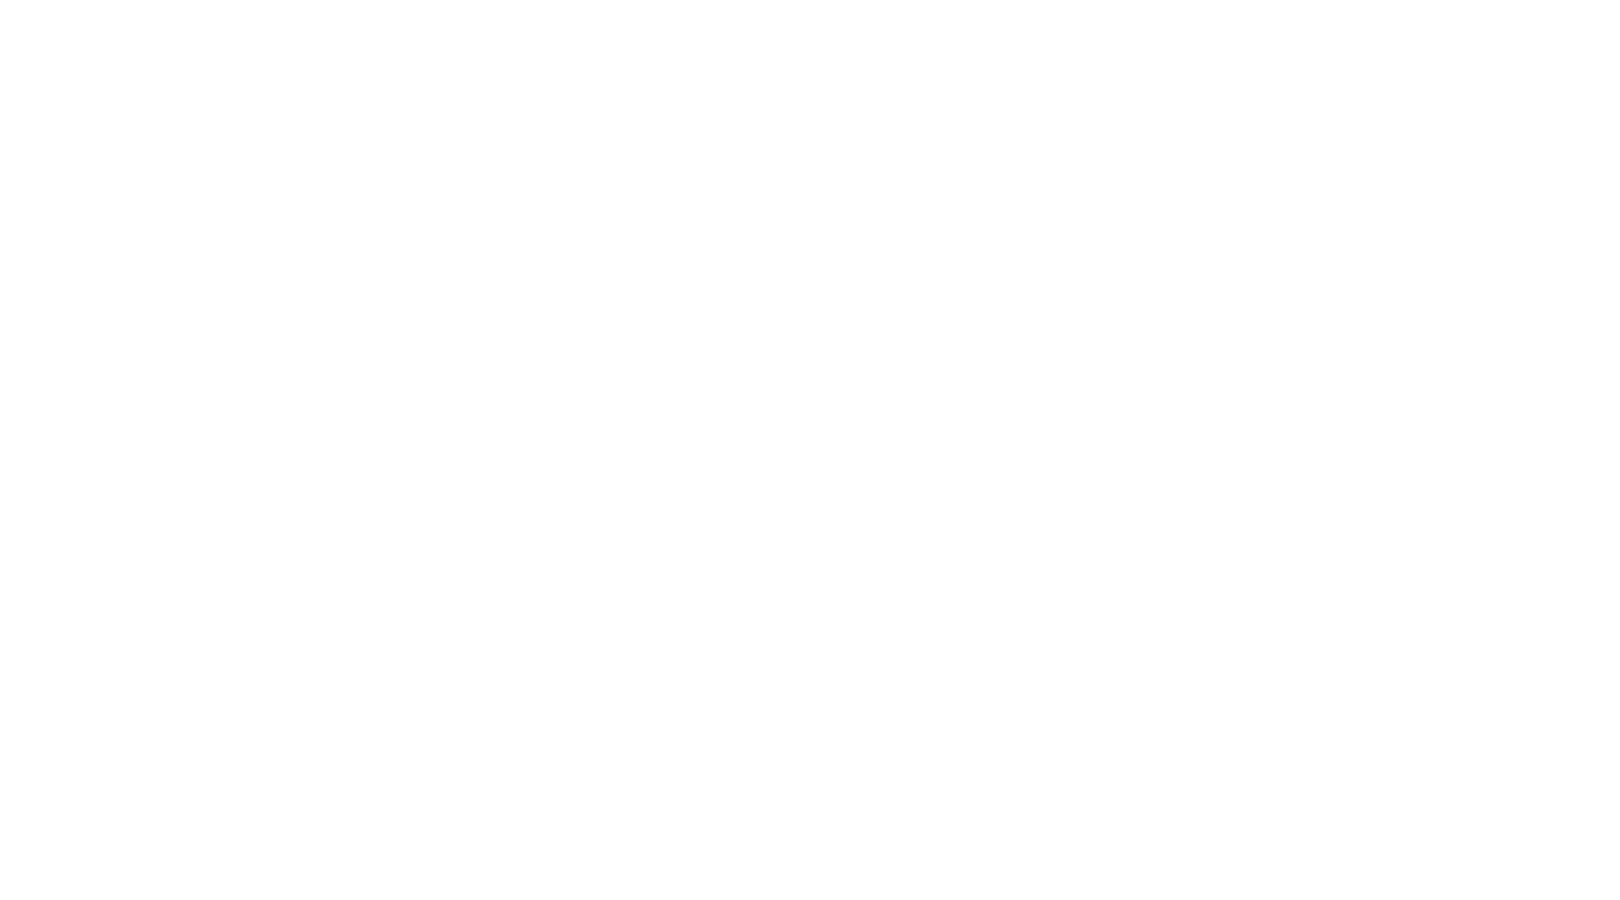

In [91]:
plt.figure(figsize=(18,10))
plt.plot(Eaxis,(DFT/DFT.sum())+0.002, label='DFT')
plt.plot(Eaxis,(DFT_convolvedGaus/DFT_convolvedGaus.sum())+0.0015, label='Uniform resolution effect on DFT')
plt.plot(Eaxis,(g1_com/g1_com.sum())+0.0007, label='Raw DOS')
plt.plot(Eaxis,(com/com.sum()), label='Reconstructed DOS (Linearized Bregman)' )
plt.xlabel('E')
plt.ylabel('Intensity')
plt.legend(fontsize='large',bbox_to_anchor=(0.8, 0.8))
plt.show()

<IPython.core.display.Javascript object>


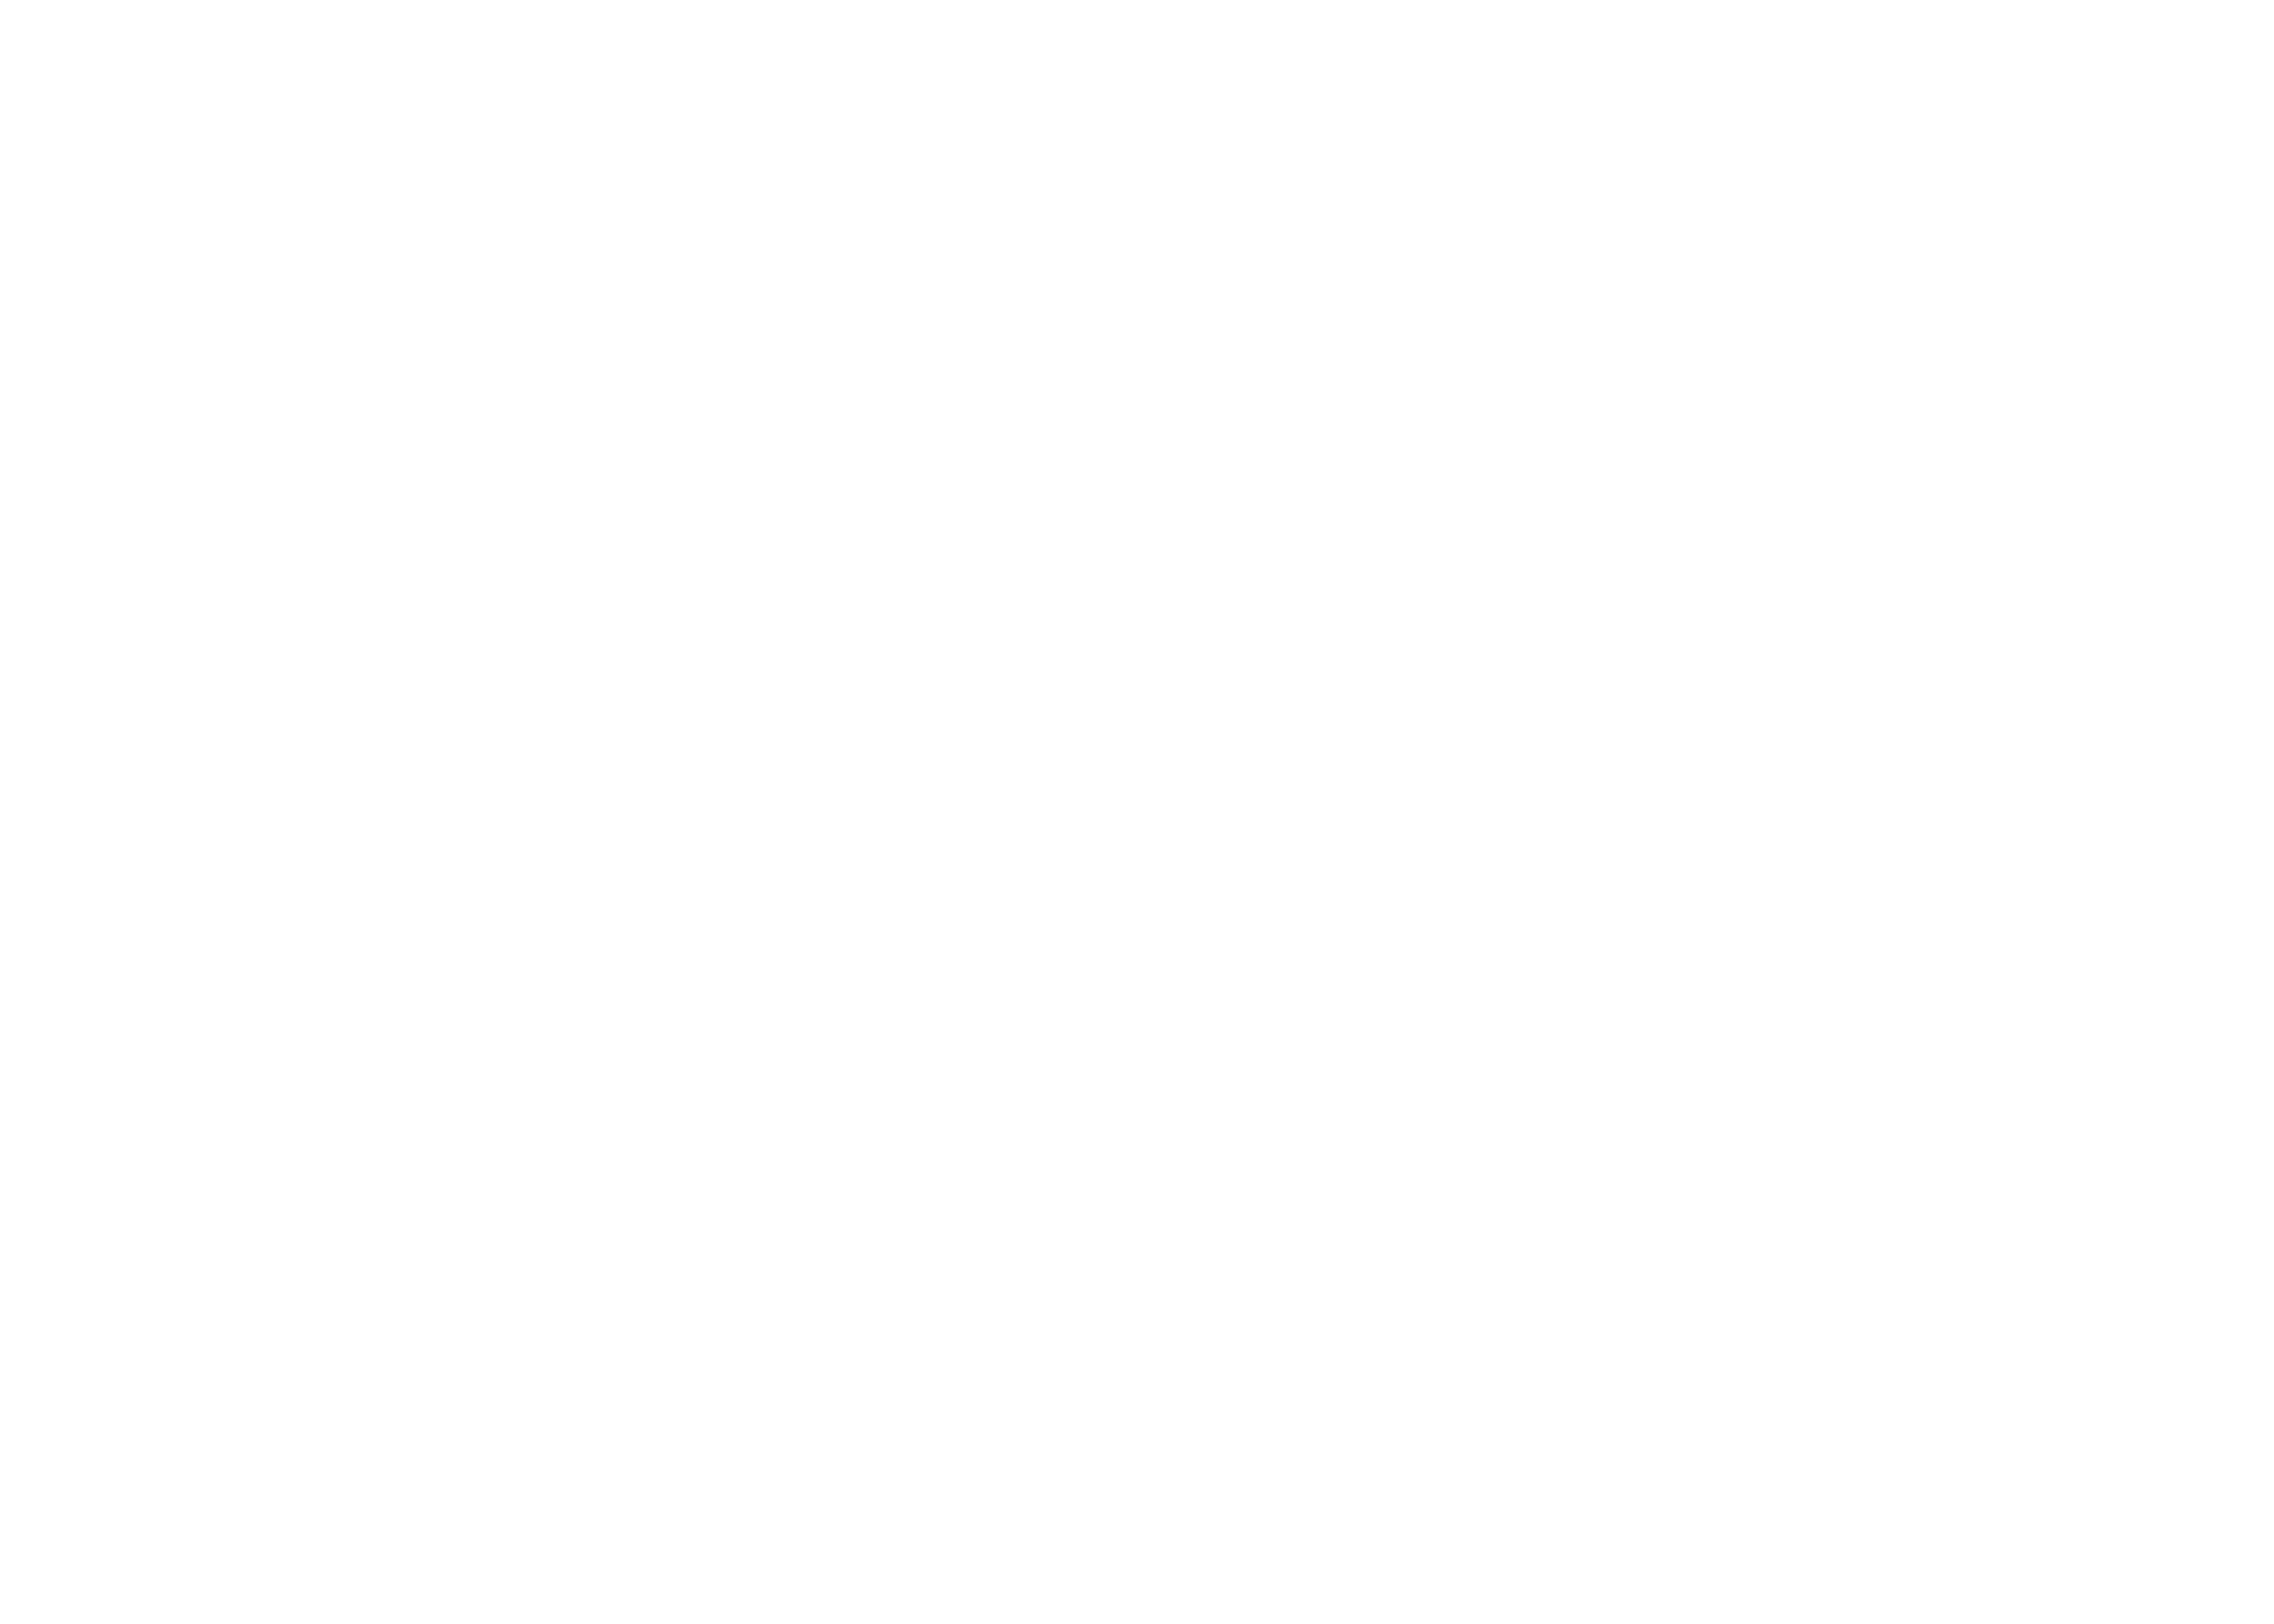

<IPython.core.display.Javascript object>


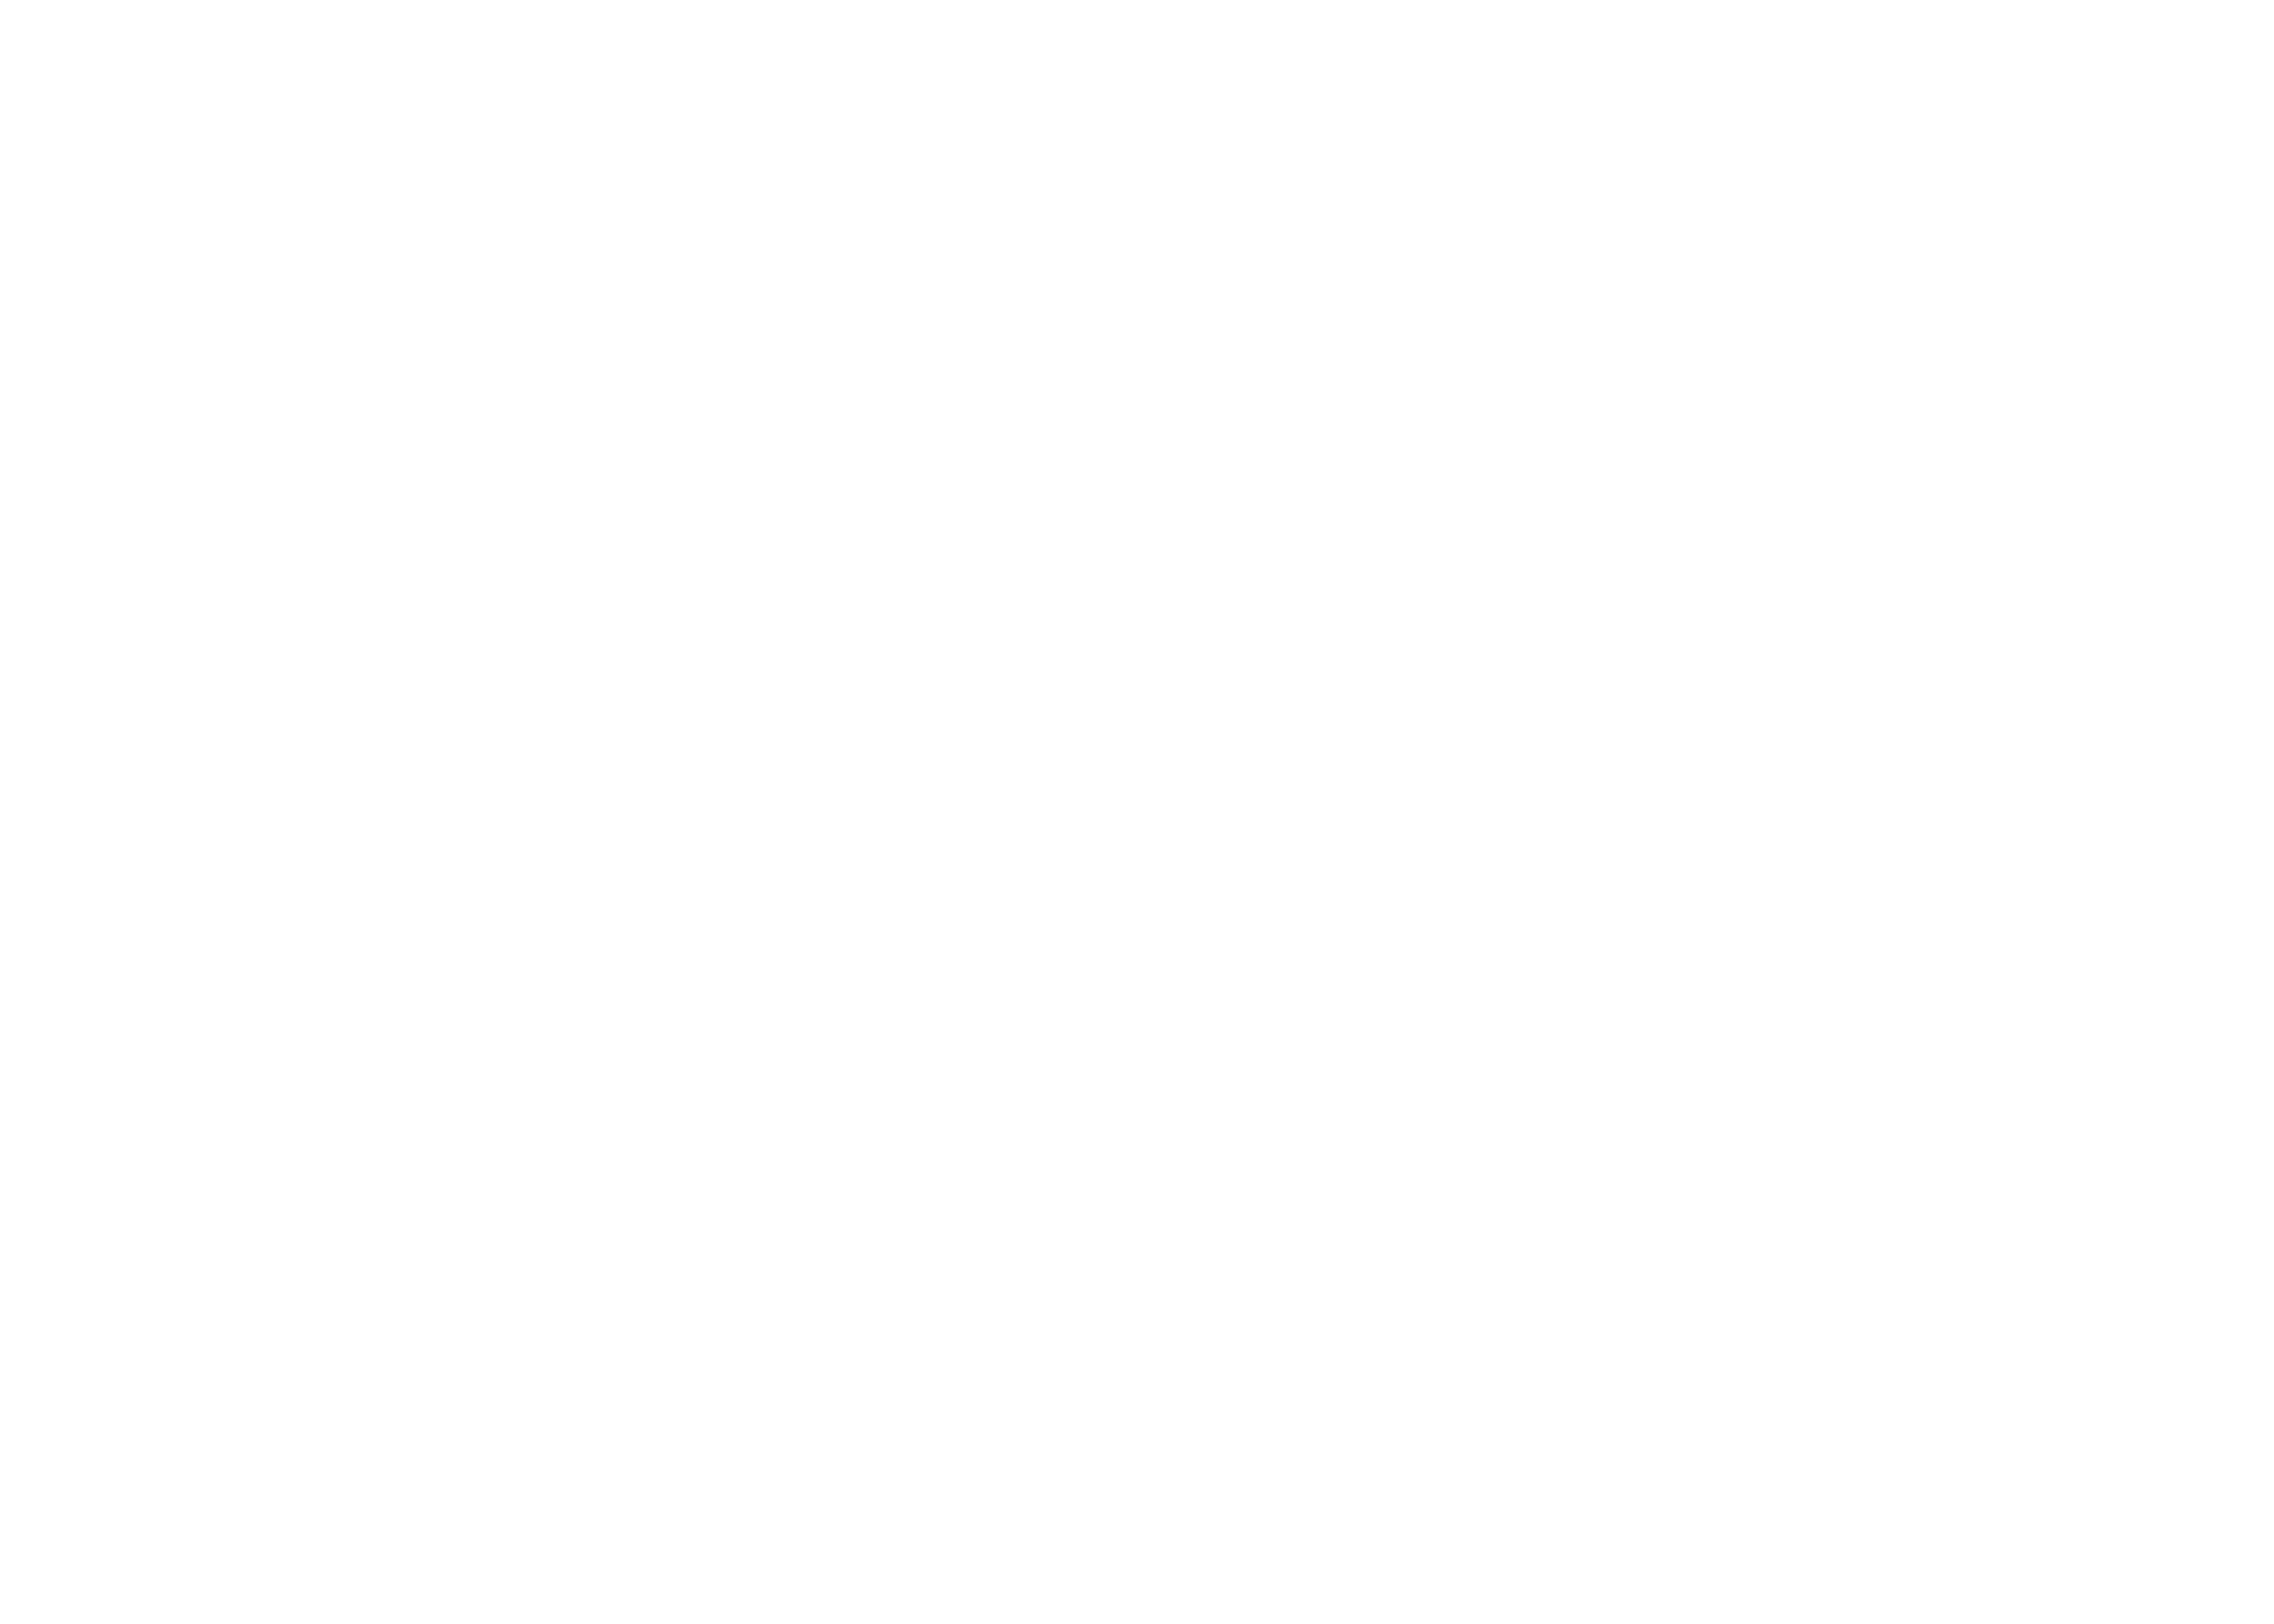

In [92]:
plt.figure(figsize=(35,25))
plt.rc('font', size=30)
fontsze=50
# plt.plot(Eaxis,(DFT/DFT.sum())*10000 ,label='DFT')
plt.plot(Eaxis,(DFT_convolvedGaus/DFT_convolvedGaus.sum())*10000 ,label='Uniform resolution effect on DFT')
plt.plot(Eaxis,(g1_com/g1_com.sum())*10000, label='Raw DOS')
plt.plot(Eaxis,(com/com.sum())*10000, label='Linearized Bregman' )


plt.legend( fontsize=fontsze,bbox_to_anchor=(0.57, 1),prop={'family': 'serif','size':'xx-large'})
plt.xlabel('E (meV)', fontsize=fontsze,family='serif')
plt.xticks(fontsize=fontsze,family='serif')
plt.ylabel('Intensity (arb. units)',fontsize=fontsze,family='serif')
plt.yticks(fontsize=fontsze,family='serif')
# plt.show()

plt.savefig('significance1.eps',  dpi=1000)

# regularized Lucy Richardson 

In [274]:
!rm /home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/Regularized_LucyRichardson_L1norm.pyc
import srins.powder.Regularized_LucyRichardson_L1norm as L1lr
reload(L1lr)

<module 'srins.powder.Regularized_LucyRichardson_L1norm' from '/home/fi0/dev/sandbox/SR-INS/1D/dev/srins/srins/powder/Regularized_LucyRichardson_L1norm.pyc'>

In [275]:
r1,E1,EB1,In1=L1lr.deconvolve_L1_NS(g1, res_mat1, ini1, 0.004, 0.0001, 'errorModel', value, maxIter=100)

NameError: name 'res_mat1' is not defined

In [ ]:
print ('no of iteration for regularized Lucy richardson: ', In1)

In [ ]:
plt.figure()
plt.plot(Eaxis, r1/r1.sum())
# plt.plot(R/R.sum())
plt.show()

# comparison

In [ ]:
plt.figure()
plt.plot(Eaxis, RU/RU.sum(), label='Linearized Bregman')
plt.plot(Eaxis, recSplit/recSplit.sum()+0.0005, label='Bregman Split')
plt.plot(Eaxis,R/R.sum()+0.001,label='Lucy Richardson')
# plt.plot(Eaxis, r1/r1.sum()+0.00,label='Regularized Lucy Richardson')
plt.legend(fontsize='x-large',loc='upper right', bbox_to_anchor=(.59, 1.12))
plt.ylabel('Intensity')
plt.xlabel('E')
# plt.xlim(0,200)
plt.show()